In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import rc, rcParams
import numpy as np 
import pandas as pd
from scipy import stats
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.table import Table
from astropy.cosmology import FlatLambdaCDM

In [2]:
# Plot Setup

rcParams['font.size'] = 14.
rcParams['axes.titlepad'] = 20
rcParams['xtick.direction'] = 'in'
rcParams['ytick.direction'] = 'in'
rcParams['xtick.top'] = True
rcParams['ytick.right'] = True
font = {'family': 'normal', 'size': 14}
rc('axes', linewidth=1)
rc("text", usetex=True)
rc('font', family='serif')
# rc('font', serif='Times')
rc('legend', fontsize=12)
rc('xtick.major', size=5, width=1)
rc('ytick.major', size=5, width=1)
rc('xtick.minor', size=3, width=1)
rc('ytick.minor', size=3, width=1)

In [3]:
# Read Pantheon data

filename = 'data/morphology_Ancillary_C11_corr.csv'
SNdata = pd.read_csv(filename,  sep=';')

<IPython.core.display.Javascript object>


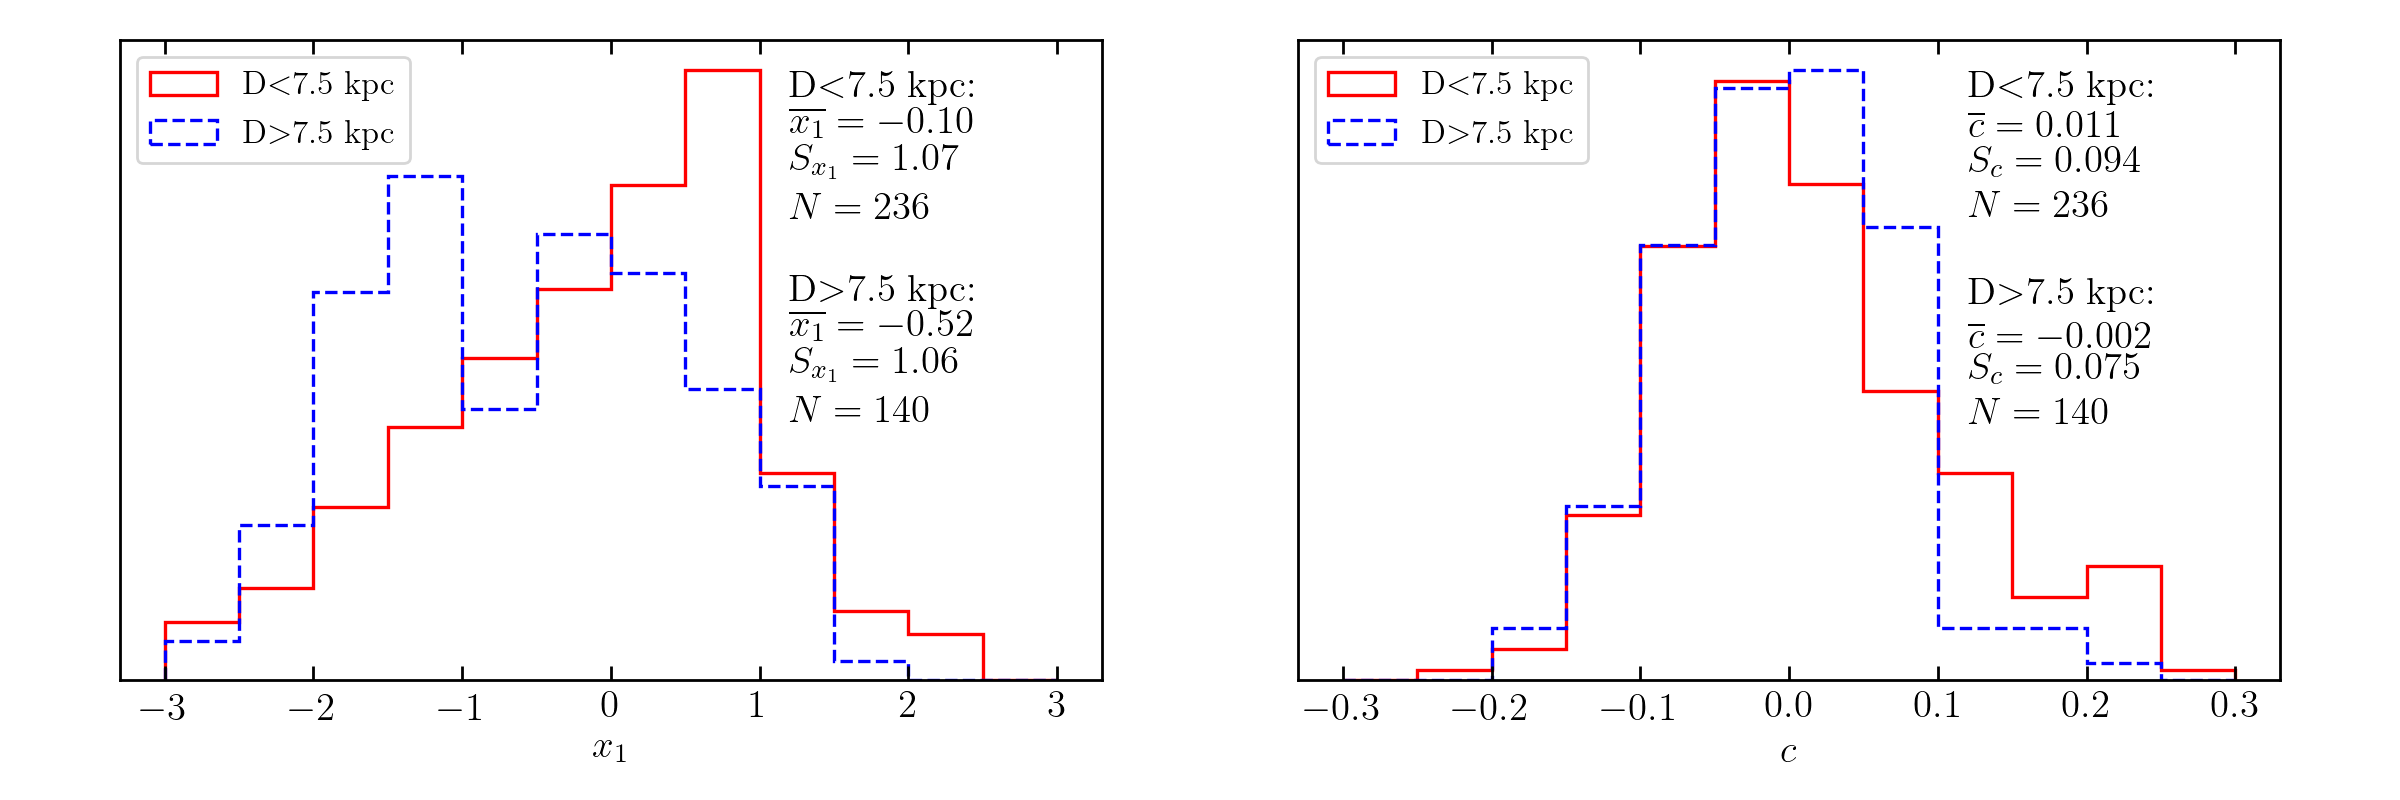

In [5]:
# Galactocentric separation

cosmo = FlatLambdaCDM(H0=70, Om0=0.3, Tcmb0=2.725)

fig = plt.figure(figsize=(12,4))
fig.subplots_adjust(left=.05, bottom=.15, right=.95, top=.95)


x1_less = []
x1_more = []

c_less = []
c_more = []

for index, row in SNdata[(SNdata['Host coord'].notna()) & (SNdata['zCMB']<0.2)].iterrows():    
    host = SkyCoord(row['Host coord'], unit=(u.hourangle, u.deg))
    sn = SkyCoord(row['RA'],row['DECL'], unit=(u.deg,u.deg))
    sep = sn.separation(host)
    dist = cosmo.angular_diameter_distance(row['zCMB'])
    gc_dist = sep.rad*dist.to('kpc')
    if gc_dist.value < 7.5:
        x1_less.append(row['x1'])
        c_less.append(row['c'])
    else:
        x1_more.append(row['x1'])
        c_more.append(row['c'])

bins_x1 = [-3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
bins_c = [-0.3, -0.25, -0.2, -0.15, -0.1, -0.05, 0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]


plt.subplot(121)
plt.hist(x1_less, 
         bins=bins_x1, histtype='step', orientation='vertical', edgecolor='red',  facecolor="None", ls='solid', density=True, linewidth=1.2, label='D$<$7.5 kpc')
plt.hist(x1_more, 
         bins=bins_x1, histtype='step', orientation='vertical', edgecolor='blue',  facecolor="None", ls='--', density=True, linewidth=1.2, label='D$>$7.5 kpc')
plt.xlabel('$x_1$')
plt.yticks([])

plt.text(1.2,0.34,'D$<$7.5 kpc:\n $\overline{x_1}=%1.2f$ \n $S_{x_1}=%1.2f$ \n $N=%i$' % (np.mean(x1_less), np.std(x1_less, ddof=1), len(x1_less)),
         bbox=dict(boxstyle="square",
                   ec='None',
                   fc='None',
                   linestyle='-',
                   lw=1.3,
                   ),
         fontsize=14
        )

plt.text(1.2,0.19,'D$>$7.5 kpc:\n $\overline{x_1}=%1.2f$ \n $S_{x_1}=%1.2f$ \n $N=%i$' % (np.mean(x1_more), np.std(x1_more, ddof=1), len(x1_more)),
         bbox=dict(boxstyle="square",
                   ec='None',
                   fc='None',
                   linestyle='-',
                   lw=1.3,
                   ),
         fontsize=14
        )


plt.legend(loc=2)


plt.subplot(122)
plt.hist(c_less, 
         bins=bins_c, histtype='step', orientation='vertical', edgecolor='red',  facecolor="None", ls='solid', density=True, linewidth=1.2, label='D$<$7.5 kpc')
plt.hist(c_more, 
         bins=bins_c, histtype='step', orientation='vertical', edgecolor='blue',  facecolor="None", ls='--', density=True, linewidth=1.2, label='D$>$7.5 kpc')
plt.xlabel('$c$')
plt.yticks([])

plt.text(0.12,3.8,'D$<$7.5 kpc:\n $\overline{c}=%1.3f$ \n $S_{c}=%1.3f$ \n $N=%i$' % (np.mean(c_less), np.std(c_less, ddof=1), len(c_less)),
         bbox=dict(boxstyle="square",
                   ec='None',
                   fc='None',
                   linestyle='-',
                   lw=1.3,
                   ),
         fontsize=14
        )

plt.text(0.12,2.1,'D$>$7.5 kpc:\n $\overline{c}=%1.3f$ \n $S_{c}=%1.3f$ \n $N=%i$' % (np.mean(c_more), np.std(c_more, ddof=1), len(c_more)),
         bbox=dict(boxstyle="square",
                   ec='None',
                   fc='None',
                   linestyle='-',
                   lw=1.3,
                   ),
         fontsize=14
        )

plt.legend(loc=2)

# plt.savefig('../plots/hist_gcdist.pdf')

<IPython.core.display.Javascript object>


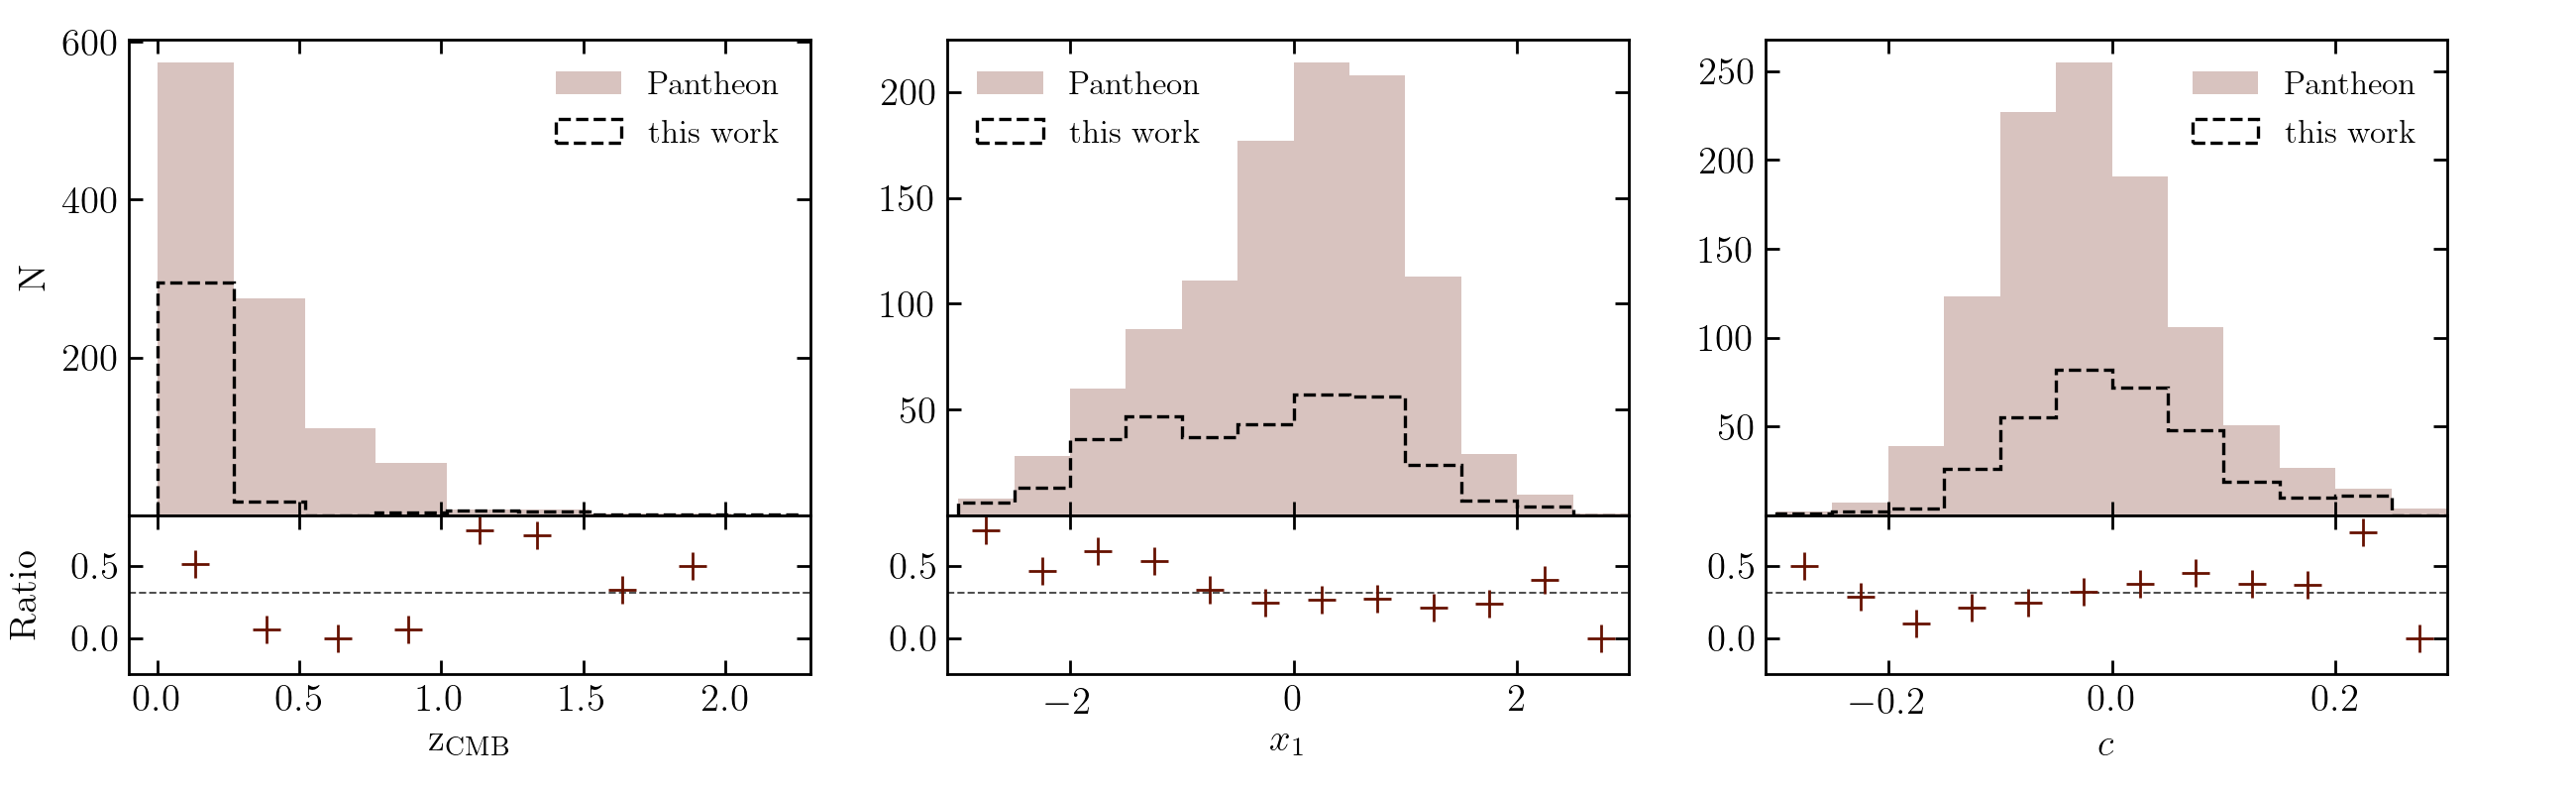

(-0.25, 0.85)

In [16]:
# Figure z, x1, c distribution

from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(13,4))
fig.subplots_adjust(left=.05, bottom=.15, right=.95, top=.95, hspace=0)

gs = GridSpec(2, 3, height_ratios=[3, 1])
ax0 = fig.add_subplot(gs[0])
ax1 = fig.add_subplot(gs[1])
ax2 = fig.add_subplot(gs[2])
ax3 = fig.add_subplot(gs[3])
ax4 = fig.add_subplot(gs[4])
ax5 = fig.add_subplot(gs[5])

bins_z = [0.0, 0.27, 0.52, 0.77, 1.02, 1.27, 1.52, 1.77, 2.02, 2.27]
bins_z_bottom = [0.135, 0.385, 0.635, 0.885, 1.135, 1.335, 1.635, 1.885, 2.135]

bins_x1 = [-3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
bins_x1_bottom = [-2.75, -2.25, -1.75, -1.25, -0.75, -0.25, 0.25, 0.75, 1.25, 1.75, 2.25, 2.75]

bins_c = [-0.3, -0.25, -0.2, -0.15, -0.1, -0.05, 0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
bins_c_bottom = [-0.275, -0.225, -0.175, -0.125, -0.075, -0.025, 0.025, 0.075, 0.125, 0.175, 0.225, 0.275]


####
zp1, zp2, zp3 = ax0.hist(SNdata['zCMB'], bins=bins_z, edgecolor='None',  facecolor="#661100", alpha=0.25, ls='None', linewidth=1.2, label='Pantheon', zorder=0)
zw1, zw2, zw3 = ax0.hist(SNdata[SNdata['total_type'].notna()]['zCMB'], bins=bins_z, histtype='step', edgecolor='black',  facecolor="None", ls='dashed', linewidth=1.2, label='this work')
ax0.set_ylabel('N')
ax0.set_xlim(-0.1,2.3)
ax0.legend(frameon=False)
yticks = ax0.yaxis.get_major_ticks() 
yticks[0].label1.set_visible(False)

ax3.plot(bins_z_bottom, zw1/zp1, marker='+', ms=10, ls = '', color="#661100", alpha=1)
ax3.set_xlabel('z$_\mathrm{{CMB}}$')
ax3.set_ylabel('Ratio', labelpad=10)
ax3.hlines(len(SNdata[SNdata['total_type'].notna()]['zCMB'])/len(SNdata['zCMB']), -0.1, 2.3, ls='dashed', alpha=0.7, lw=0.7)
ax3.set_xlim(-0.1,2.3)
ax3.set_ylim(-0.25,0.85)

####
xp1, xp2, xp3 = ax1.hist(SNdata['x1'], bins=bins_x1, edgecolor='None',  facecolor="#661100", alpha=0.25, ls='None', linewidth=1.2, label='Pantheon', zorder=0)
xw1, xw2, xw3 = ax1.hist(SNdata[SNdata['total_type'].notna()]['x1'], bins=bins_x1, histtype='step', edgecolor='black',  facecolor="None", ls='dashed', linewidth=1.2, label='this work')
ax1.set_xlim(-3.1,3)
ax1.legend(frameon=False)
yticks = ax1.yaxis.get_major_ticks() 
yticks[0].label1.set_visible(False)


ax4.plot(bins_x1_bottom, xw1/xp1, marker='+', ms=10, ls = '', color="#661100", alpha=1)
ax4.set_xlabel('$x_1$')
ax4.hlines(len(SNdata[SNdata['total_type'].notna()]['x1'])/len(SNdata['x1']), -3.1, 3, ls='dashed', alpha=0.7, lw=0.7)
ax4.set_xlim(-3.1,3)
ax4.set_ylim(-0.25,0.85)


####
cp1, cp2, cp3 = ax2.hist(SNdata['c'], bins=bins_c, edgecolor='None',  facecolor="#661100", alpha=0.25, ls='None', linewidth=1.2, label='Pantheon', zorder=0)
cw1, cw2, cw3 = ax2.hist(SNdata[SNdata['total_type'].notna()]['c'], bins=bins_c, histtype='step', edgecolor='black',  facecolor="None", ls='dashed', linewidth=1.2, label='this work')
ax2.set_xlim(-0.31,0.3)
ax2.legend(frameon=False)
yticks = ax2.yaxis.get_major_ticks() 
yticks[0].label1.set_visible(False)


ax5.plot(bins_c_bottom, cw1/cp1, marker='+', ms=10, ls = '', color="#661100", alpha=1)
ax5.set_xlabel('$c$')
ax5.hlines(len(SNdata[SNdata['total_type'].notna()]['c'])/len(SNdata['c']), -0.31, 0.3, ls='dashed', alpha=0.7, lw=0.7)
ax5.set_xlim(-0.31,0.3)
ax5.set_ylim(-0.25,0.85)

# plt.savefig('../plots/hist.pdf')

<IPython.core.display.Javascript object>


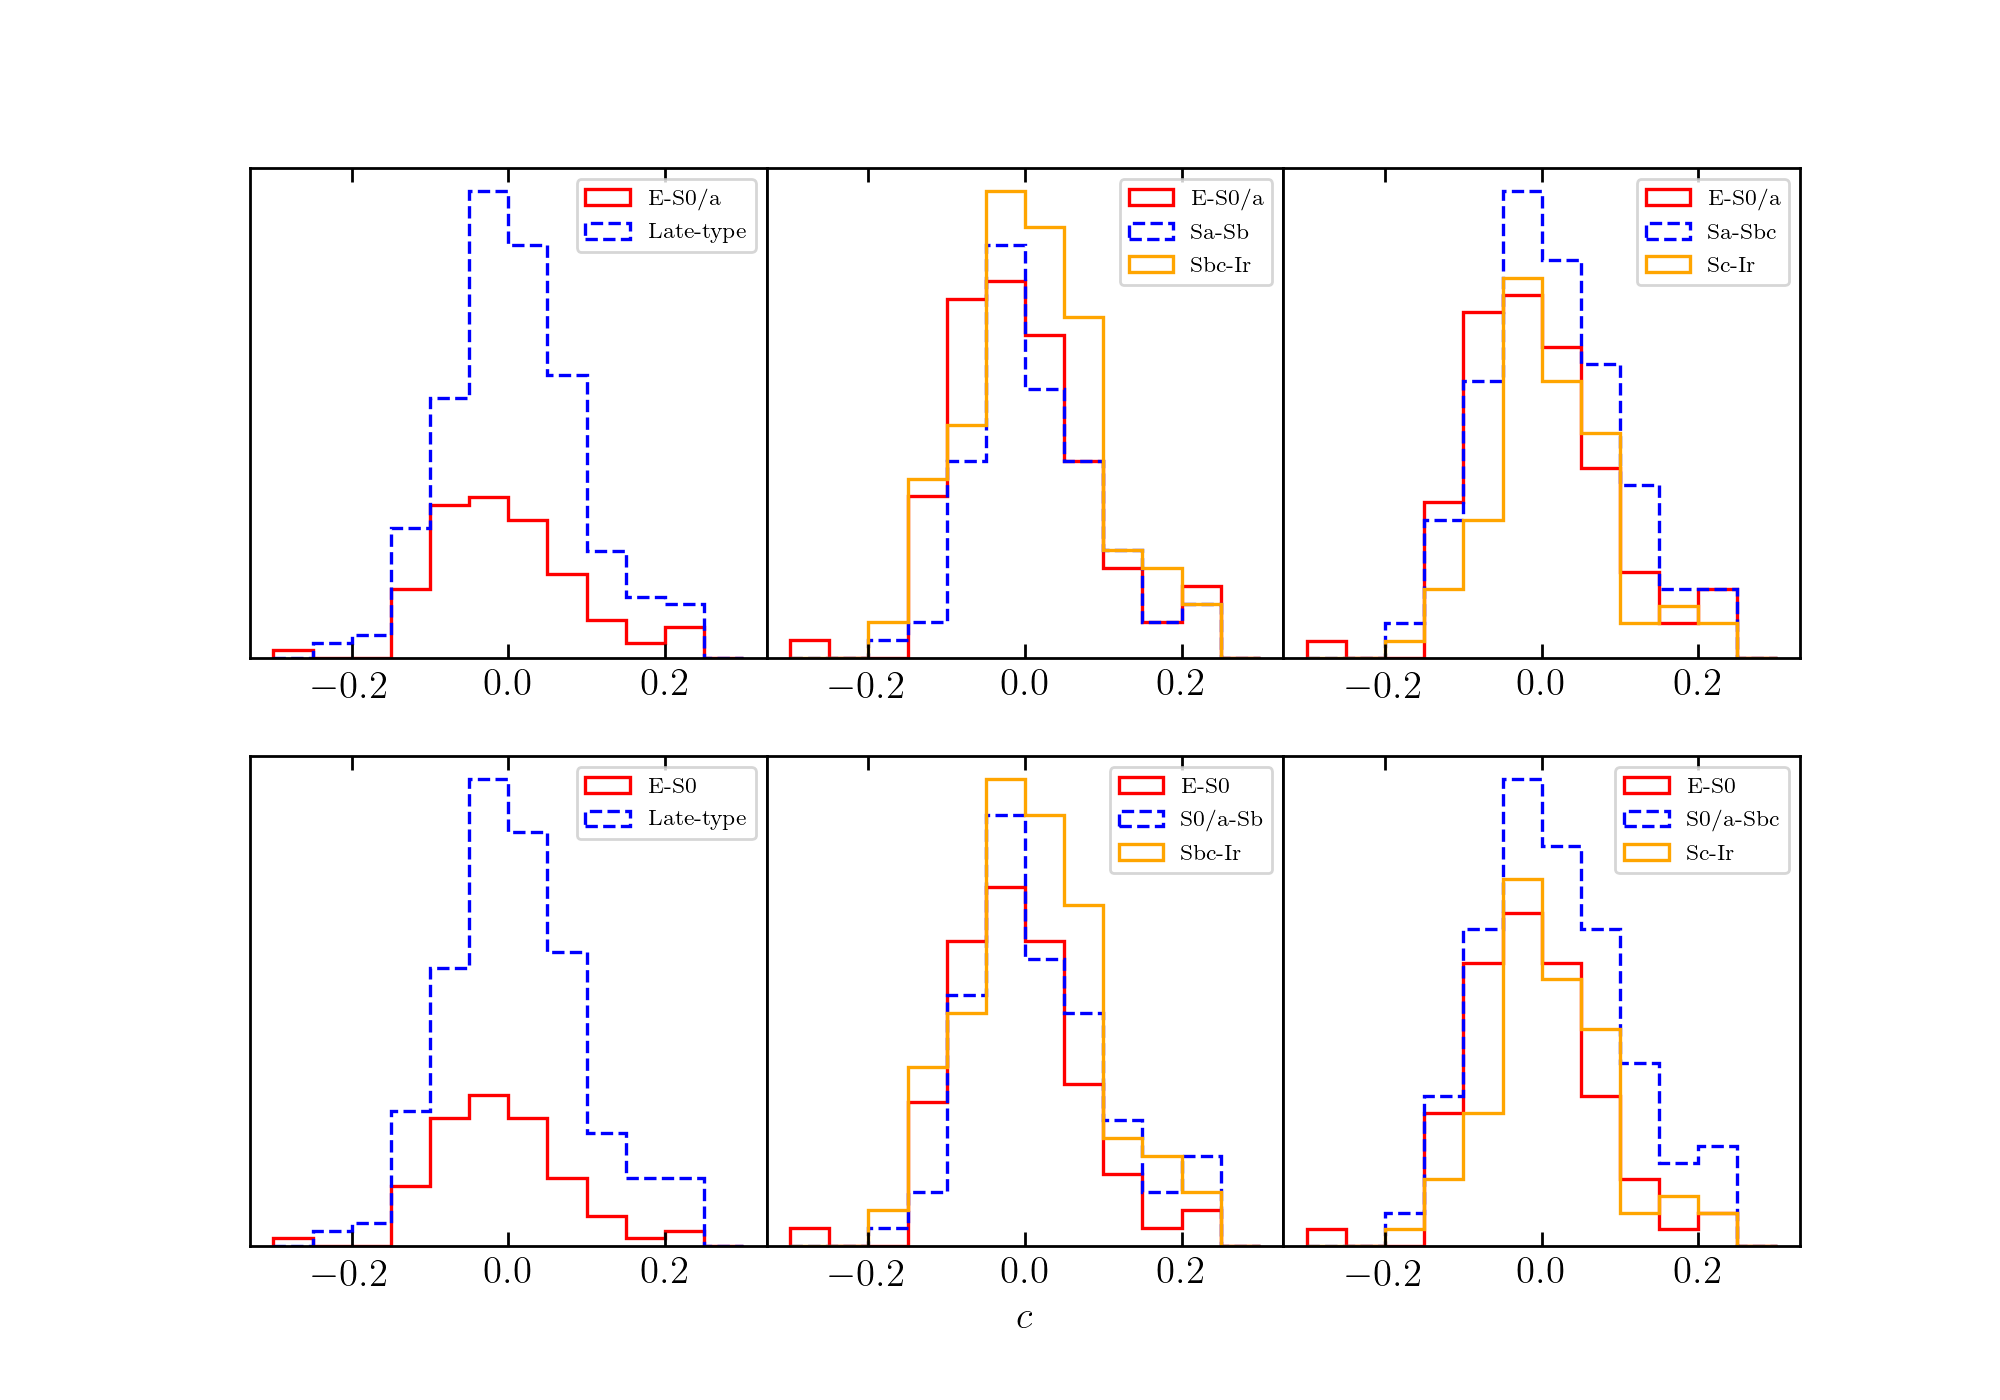

In [6]:
# x1,c distribution for different sub-divisions

fig = plt.figure(figsize=(10,7))
plt.subplots_adjust(wspace=0)
rc('legend', fontsize=8)

bins_x1 = [-3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
bins_c = [-0.3, -0.25, -0.2, -0.15, -0.1, -0.05, 0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]

# for stretch
# var = 'x1'
# bins = bins_x1
# label = '$x_1$'

# for color
var = 'c'
bins = bins_c
label = '$c$'

plt.subplot(231)
plt.hist(SNdata[(SNdata['total_type'] == 'Early-type') | (SNdata['total_type'] == 'Pa') | (SNdata['total_type'] == 'E') | (SNdata['total_type'] == 'E/S0') | (SNdata['total_type'] == 'S0') | (SNdata['total_type'] == 'S0/a')][var], 
         bins=bins, histtype='step', orientation='vertical', edgecolor='red',  facecolor="None", ls='solid', density=False, linewidth=1.2, label='E-S0/a')
plt.hist(SNdata[(SNdata['total_type'] == 'Sa') | (SNdata['total_type'] == 'Sab') | (SNdata['total_type'] == 'Sb') | (SNdata['total_type'] == 'Sbc') | (SNdata['total_type'] == 'Sc') | (SNdata['total_type'] == 'Scd') | (SNdata['total_type'] == 'Sd') | (SNdata['total_type'] == 'Ir') | (SNdata['total_type'] == 'SF') | (SNdata['total_type'] == 'Late-type') | (SNdata['total_type'] == 'Sburst')][var], 
         bins=bins, histtype='step', orientation='vertical', edgecolor='blue',  facecolor="None", ls='--', density=False, linewidth=1.2, label='Late-type')
plt.yticks([])
plt.legend()

plt.subplot(232)
plt.hist(SNdata[(SNdata['total_type'] == 'Early-type') | (SNdata['total_type'] == 'Pa') | (SNdata['total_type'] == 'E') | (SNdata['total_type'] == 'E/S0') | (SNdata['total_type'] == 'S0') | (SNdata['total_type'] == 'S0/a')][var], 
         bins=bins, histtype='step', orientation='vertical', edgecolor='red',  facecolor="None", ls='solid', density=False, linewidth=1.2, label='E-S0/a')
plt.hist(SNdata[(SNdata['total_type'] == 'Sa') | (SNdata['total_type'] == 'Sab') | (SNdata['total_type'] == 'Sb')][var], 
         bins=bins, histtype='step', orientation='vertical', edgecolor='blue',  facecolor="None", ls='--', density=False, linewidth=1.2, label='Sa-Sb')
plt.hist(SNdata[(SNdata['total_type'] == 'Sbc') | (SNdata['total_type'] == 'Sc') | (SNdata['total_type'] == 'Scd') | (SNdata['total_type'] == 'Sd') | (SNdata['total_type'] == 'Ir')][var], 
         bins=bins, histtype='step', orientation='vertical', edgecolor='orange',  facecolor="None", ls='solid', density=False, linewidth=1.2, label='Sbc-Ir')
plt.yticks([])
plt.legend()

plt.subplot(233)
plt.hist(SNdata[(SNdata['total_type'] == 'Early-type') | (SNdata['total_type'] == 'Pa') | (SNdata['total_type'] == 'E') | (SNdata['total_type'] == 'E/S0') | (SNdata['total_type'] == 'S0') | (SNdata['total_type'] == 'S0/a')][var], 
         bins=bins, histtype='step', orientation='vertical', edgecolor='red',  facecolor="None", ls='solid', density=False, linewidth=1.2, label='E-S0/a')
plt.hist(SNdata[(SNdata['total_type'] == 'Sa') | (SNdata['total_type'] == 'Sab') | (SNdata['total_type'] == 'Sb') | (SNdata['total_type'] == 'Sbc')][var], 
         bins=bins, histtype='step', orientation='vertical', edgecolor='blue',  facecolor="None", ls='--', density=False, linewidth=1.2, label='Sa-Sbc')
plt.hist(SNdata[(SNdata['total_type'] == 'Sc') | (SNdata['total_type'] == 'Scd') | (SNdata['total_type'] == 'Sd') | (SNdata['total_type'] == 'Ir')][var], 
         bins=bins, histtype='step', orientation='vertical', edgecolor='orange',  facecolor="None", ls='solid', density=False, linewidth=1.2, label='Sc-Ir')
plt.yticks([])
plt.legend()


plt.subplot(234)
plt.hist(SNdata[(SNdata['total_type'] == 'Early-type') | (SNdata['total_type'] == 'Pa') | (SNdata['total_type'] == 'E') | (SNdata['total_type'] == 'E/S0') | (SNdata['total_type'] == 'S0') ][var], 
         bins=bins, histtype='step', orientation='vertical', edgecolor='red',  facecolor="None", ls='solid', density=False, linewidth=1.2, label='E-S0')
plt.hist(SNdata[(SNdata['total_type'] == 'S0/a') | (SNdata['total_type'] == 'Sa') | (SNdata['total_type'] == 'Sab') | (SNdata['total_type'] == 'Sb') | (SNdata['total_type'] == 'Sbc') | (SNdata['total_type'] == 'Sc') | (SNdata['total_type'] == 'Scd') | (SNdata['total_type'] == 'Sd') | (SNdata['total_type'] == 'Ir') | (SNdata['total_type'] == 'SF') | (SNdata['total_type'] == 'Late-type') | (SNdata['total_type'] == 'Sburst')][var], 
         bins=bins, histtype='step', orientation='vertical', edgecolor='blue',  facecolor="None", ls='--', density=False, linewidth=1.2, label='Late-type')
plt.yticks([])
plt.legend()


plt.subplot(235)
plt.hist(SNdata[(SNdata['total_type'] == 'Early-type') | (SNdata['total_type'] == 'Pa') | (SNdata['total_type'] == 'E') | (SNdata['total_type'] == 'E/S0') | (SNdata['total_type'] == 'S0')][var], 
         bins=bins, histtype='step', orientation='vertical', edgecolor='red',  facecolor="None", ls='solid', density=False, linewidth=1.2, label='E-S0')
plt.hist(SNdata[(SNdata['total_type'] == 'S0/a') | (SNdata['total_type'] == 'Sa') | (SNdata['total_type'] == 'Sab') | (SNdata['total_type'] == 'Sb')][var], 
         bins=bins, histtype='step', orientation='vertical', edgecolor='blue',  facecolor="None", ls='--', density=False, linewidth=1.2, label='S0/a-Sb')
plt.hist(SNdata[(SNdata['total_type'] == 'Sbc') | (SNdata['total_type'] == 'Sc') | (SNdata['total_type'] == 'Scd') | (SNdata['total_type'] == 'Sd') | (SNdata['total_type'] == 'Ir')][var], 
         bins=bins, histtype='step', orientation='vertical', edgecolor='orange',  facecolor="None", ls='solid', density=False, linewidth=1.2, label='Sbc-Ir')
plt.yticks([])
plt.xlabel(label)
plt.legend()


plt.subplot(236)
plt.hist(SNdata[(SNdata['total_type'] == 'Early-type') | (SNdata['total_type'] == 'Pa') | (SNdata['total_type'] == 'E') | (SNdata['total_type'] == 'E/S0') | (SNdata['total_type'] == 'S0')][var], 
         bins=bins, histtype='step', orientation='vertical', edgecolor='red',  facecolor="None", ls='solid', density=False, linewidth=1.2, label='E-S0')
plt.hist(SNdata[(SNdata['total_type'] == 'S0/a') | (SNdata['total_type'] == 'Sa') | (SNdata['total_type'] == 'Sab') | (SNdata['total_type'] == 'Sb') | (SNdata['total_type'] == 'Sbc')][var], 
         bins=bins, histtype='step', orientation='vertical', edgecolor='blue',  facecolor="None", ls='--', density=False, linewidth=1.2, label='S0/a-Sbc')
plt.hist(SNdata[(SNdata['total_type'] == 'Sc') | (SNdata['total_type'] == 'Scd') | (SNdata['total_type'] == 'Sd') | (SNdata['total_type'] == 'Ir')][var], 
         bins=bins, histtype='step', orientation='vertical', edgecolor='orange',  facecolor="None", ls='solid', density=False, linewidth=1.2, label='Sc-Ir')
plt.yticks([])
plt.legend()


# plt.savefig('../plots/hist_x1.pdf')
# plt.savefig('../plots/hist_c.pdf')

<IPython.core.display.Javascript object>


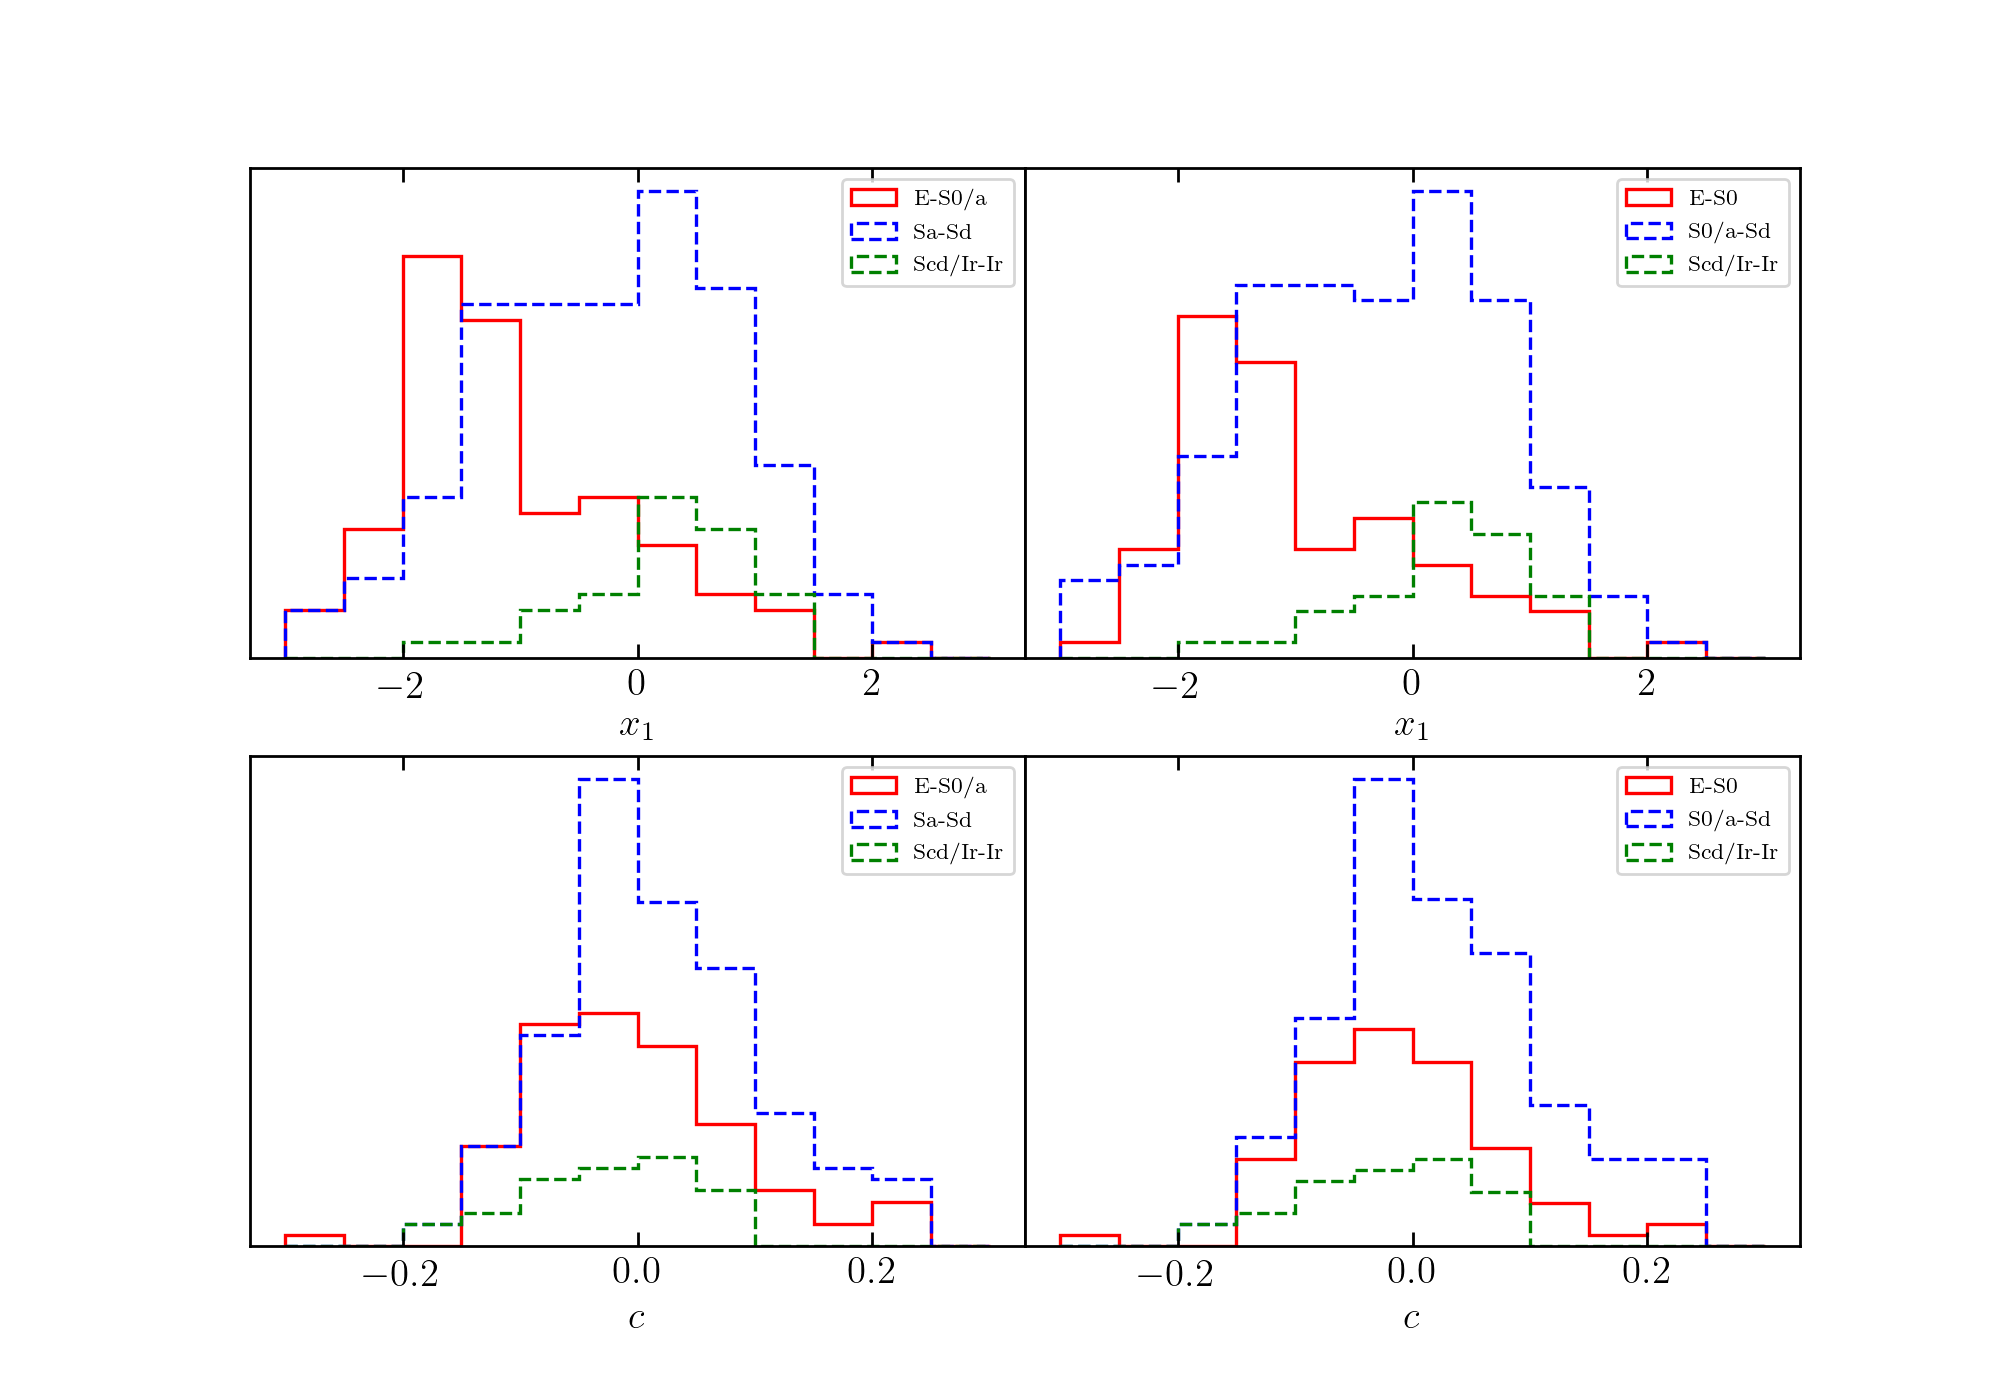

In [7]:
# x1,c distribution for different sub-divisions

fig = plt.figure(figsize=(10,7))
plt.subplots_adjust(wspace=0)
rc('legend', fontsize=8)

bins_x1 = [-3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
bins_c = [-0.3, -0.25, -0.2, -0.15, -0.1, -0.05, 0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]

ET = SNdata[(SNdata['total_type'] == 'Early-type') | (SNdata['total_type'] == 'Pa') | (SNdata['total_type'] == 'E') | (SNdata['total_type'] == 'E/S0') | (SNdata['total_type'] == 'S0') | (SNdata['total_type'] == 'S0/a')]
LT = SNdata[(SNdata['total_type'] == 'Sa') | (SNdata['total_type'] == 'Sab') | (SNdata['total_type'] == 'Sb') | (SNdata['total_type'] == 'Sbc') | (SNdata['total_type'] == 'Sc') | (SNdata['total_type'] == 'Scd') | (SNdata['total_type'] == 'Sd') | (SNdata['total_type'] == 'Sb/Sbc/Sc')]
IR = SNdata[(SNdata['total_type'] == 'Ir') | (SNdata['total_type'] == 'Scd/Ir')]

plt.subplot(221)
plt.hist(ET['x1'], 
         bins=bins_x1, histtype='step', orientation='vertical', edgecolor='red',  facecolor="None", ls='solid', density=False, linewidth=1.2, label='E-S0/a')
plt.hist(LT['x1'], 
         bins=bins_x1, histtype='step', orientation='vertical', edgecolor='blue',  facecolor="None", ls='--', density=False, linewidth=1.2, label='Sa-Sd')
plt.hist(IR['x1'], 
         bins=bins_x1, histtype='step', orientation='vertical', edgecolor='green',  facecolor="None", ls='--', density=False, linewidth=1.2, label='Scd/Ir-Ir')
plt.yticks([])
plt.xlabel('$x_1$')
plt.legend()


plt.subplot(222)
plt.hist(SNdata[(SNdata['total_type'] == 'Early-type') | (SNdata['total_type'] == 'Pa') | (SNdata['total_type'] == 'E') | (SNdata['total_type'] == 'E/S0') | (SNdata['total_type'] == 'S0') ]['x1'], 
         bins=bins_x1, histtype='step', orientation='vertical', edgecolor='red',  facecolor="None", ls='solid', density=False, linewidth=1.2, label='E-S0')
plt.hist(SNdata[(SNdata['total_type'] == 'S0/a') | (SNdata['total_type'] == 'Sa') | (SNdata['total_type'] == 'Sab') | (SNdata['total_type'] == 'Sb') | (SNdata['total_type'] == 'Sbc') | (SNdata['total_type'] == 'Sc') | (SNdata['total_type'] == 'Scd') | (SNdata['total_type'] == 'Sd')]['x1'], 
         bins=bins_x1, histtype='step', orientation='vertical', edgecolor='blue',  facecolor="None", ls='--', density=False, linewidth=1.2, label='S0/a-Sd')
plt.hist(IR['x1'], 
         bins=bins_x1, histtype='step', orientation='vertical', edgecolor='green',  facecolor="None", ls='--', density=False, linewidth=1.2, label='Scd/Ir-Ir')
plt.yticks([])
plt.xlabel('$x_1$')
plt.legend()


plt.subplot(223)
plt.hist(ET['c'], 
         bins=bins_c, histtype='step', orientation='vertical', edgecolor='red',  facecolor="None", ls='solid', density=False, linewidth=1.2, label='E-S0/a')
plt.hist(LT['c'], 
         bins=[-0.3, -0.25, -0.2, -0.15, -0.1, -0.05, 0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3], histtype='step', orientation='vertical', edgecolor='blue',  facecolor="None", ls='--', density=False, linewidth=1.2, label='Sa-Sd')
plt.hist(IR['c'], 
         bins=bins_c, histtype='step', orientation='vertical', edgecolor='green',  facecolor="None", ls='--', density=False, linewidth=1.2, label='Scd/Ir-Ir')
plt.yticks([])
plt.xlabel('$c$')
plt.legend()


plt.subplot(224)
plt.hist(SNdata[(SNdata['total_type'] == 'Early-type') | (SNdata['total_type'] == 'Pa') | (SNdata['total_type'] == 'E') | (SNdata['total_type'] == 'E/S0') | (SNdata['total_type'] == 'S0') ]['c'], 
         bins=bins_c, histtype='step', orientation='vertical', edgecolor='red',  facecolor="None", ls='solid', density=False, linewidth=1.2, label='E-S0')
plt.hist(SNdata[(SNdata['total_type'] == 'S0/a') | (SNdata['total_type'] == 'Sa') | (SNdata['total_type'] == 'Sab') | (SNdata['total_type'] == 'Sb') | (SNdata['total_type'] == 'Sbc') | (SNdata['total_type'] == 'Sc') | (SNdata['total_type'] == 'Scd') | (SNdata['total_type'] == 'Sd') ]['c'], 
         bins=bins_c, histtype='step', orientation='vertical', edgecolor='blue',  facecolor="None", ls='--', density=False, linewidth=1.2, label='S0/a-Sd')
plt.hist(IR['c'], 
         bins=bins_c, histtype='step', orientation='vertical', edgecolor='green',  facecolor="None", ls='--', density=False, linewidth=1.2, label='Scd/Ir-Ir')
plt.yticks([])
plt.xlabel('$c$')
plt.legend()

# plt.savefig('../plots/hist_3types.pdf')

In [7]:
GR1 = SNdata[(SNdata['total_type'] == 'Early-type') | (SNdata['total_type'] == 'Pa') | (SNdata['total_type'] == 'E') | (SNdata['total_type'] == 'E/S0') | (SNdata['total_type'] == 'S0') | (SNdata['total_type'] == 'S0/a')]
GR2 = SNdata[(SNdata['total_type'] == 'Sa') | (SNdata['total_type'] == 'Sab') | (SNdata['total_type'] == 'Sb') | (SNdata['total_type'] == 'Sbc') | (SNdata['total_type'] == 'Sc') | (SNdata['total_type'] == 'Scd') | (SNdata['total_type'] == 'Sd') | (SNdata['total_type'] == 'Sb/Sbc/Sc') ]
GR3 = SNdata[(SNdata['total_type'] == 'Ir') | (SNdata['total_type'] == 'Scd/Ir')]
print(np.mean(GR1['x1']), np.std(GR1['x1']))
print(np.mean(GR2['x1']), np.std(GR2['x1']))
print(np.mean(GR3['x1']), np.std(GR3['x1']))
print(np.mean(GR1['c']),
np.mean(GR2['c']),
np.mean(GR3['c']))

-1.0514565626373624 0.98893220622391
-0.23010593267973847 1.0339950823360022
0.22786854516129035 0.7323090300142701
-0.0028406034758241727 0.018136464745098033 -0.026031943548387095


<IPython.core.display.Javascript object>


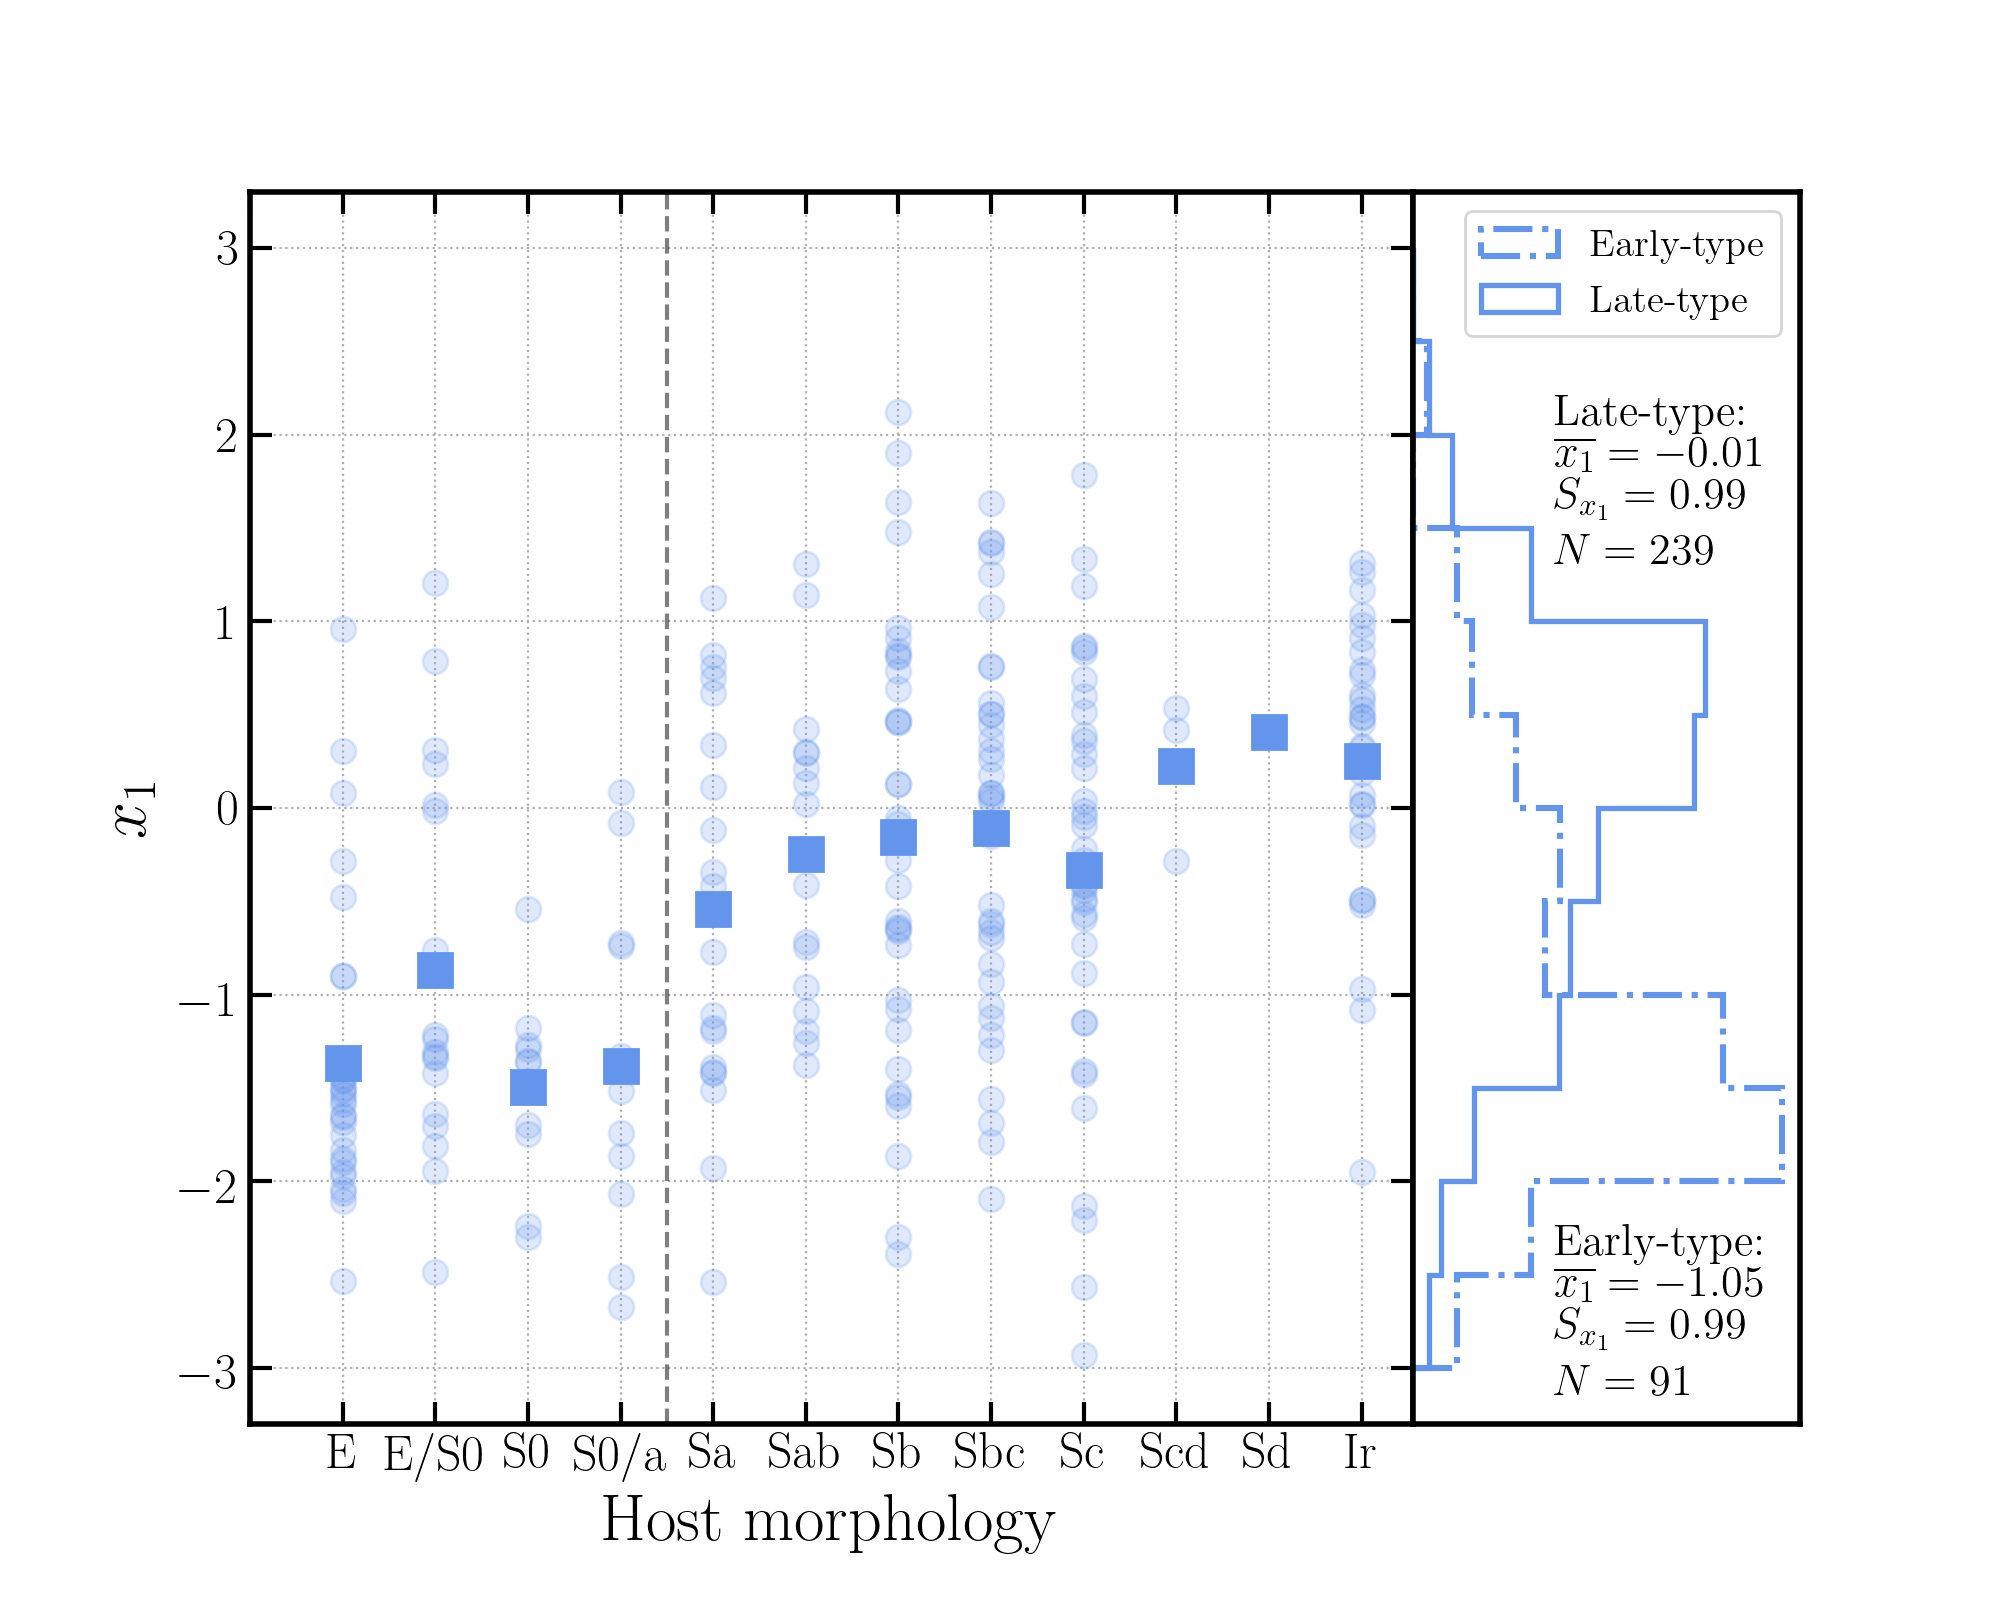

In [8]:
# Figure for stretch 2 groups

fig = plt.figure(figsize=(10,8))
plt.subplots_adjust(wspace=0)
rc('legend', fontsize=14)
rcParams['font.size'] = 18.

rc('axes', linewidth=2)
rc('xtick.major', size=8, width=1.5)
rc('ytick.major', size=8, width=1.5)
rcParams["legend.loc"] = 'upper right'


bins_x1 = [-3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]

ET = SNdata[(SNdata['total_type'] == 'Early-type') | (SNdata['total_type'] == 'Pa') | (SNdata['total_type'] == 'E') | (SNdata['total_type'] == 'E/S0') | (SNdata['total_type'] == 'S0') | (SNdata['total_type'] == 'S0/a')]
LT = SNdata[(SNdata['total_type'] == 'Sa') | (SNdata['total_type'] == 'Sab') | (SNdata['total_type'] == 'Sb') | (SNdata['total_type'] == 'Sbc') | (SNdata['total_type'] == 'Sc') | (SNdata['total_type'] == 'Scd') | (SNdata['total_type'] == 'Sd') | (SNdata['total_type'] == 'Ir') | (SNdata['total_type'] == 'SF') | (SNdata['total_type'] == 'Late-type') | (SNdata['total_type'] == 'Sb/Sbc/Sc') | (SNdata['total_type'] == 'Scd/Ir')]


# large subplot
plt.subplot2grid((2,4), (0,0), colspan=3,  rowspan=2)
types = ['E','E/S0','S0','S0/a','Sa','Sab','Sb','Sbc','Sc','Scd','Sd','Ir']
types_num = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
for i,j in zip(types, types_num): 
    var = SNdata[SNdata['total_type'].isin([i])]['x1']
    l = np.zeros((len(var),), dtype=int) + j
    plt.plot(l,var, color='cornflowerblue', zorder=3, linestyle='None', marker='o', markersize=9, alpha=0.2) 
    plt.plot(j, var.mean(), color='cornflowerblue', zorder=15, linestyle='None', marker='s', markersize=12, alpha=1)
plt.axvline(x=4.5, color='black', ls='--', alpha=0.5)

plt.xticks(np.arange(13), ('','E','E/S0','S0','S0/a','Sa','Sab','Sb','Sbc','Sc','Scd','Sd','Ir'))
plt.xlabel('Host morphology', fontsize=24)
plt.ylabel('$x_1$', fontsize=24)
plt.ylim(-3.3, 3.3)
plt.grid(ls=":")

# small subplot
plt.subplot2grid((2,4), (0,3),  rowspan=2)
plt.hist(ET['x1'], bins=bins_x1, histtype='step', orientation='horizontal', edgecolor='cornflowerblue',  facecolor="None", ls='-.', density=True, linewidth=2.2, label='Early-type')
plt.hist(LT['x1'], bins=bins_x1, histtype='step', orientation='horizontal', edgecolor='cornflowerblue',  facecolor="None", ls='-', density=True, linewidth=1.9, label='Late-type')
plt.ylim(-3.3, 3.3)
plt.text(0.21,-3.15,'Early-type:\n $\overline{x_1}=%1.2f$ \n $S_{x_1}=%1.2f$ \n $N=%i$' % (np.mean(ET['x1']), np.std(ET['x1'], ddof=1), len(ET)),
         bbox=dict(boxstyle="square",
                   ec='None',
                   fc='None',
                   linestyle='-.',
                   ),
         fontsize=16
        )
plt.text(0.21,1.3,'Late-type:\n $\overline{x_1}=%1.2f$ \n $S_{x_1}=%1.2f$ \n $N=%i$' % (np.mean(LT['x1']), np.std(LT['x1'], ddof=1), len(LT)),
         bbox=dict(boxstyle="square",
                   ec='None',
                   fc='None',
                   linestyle='-',
                   lw=1.3,
                   ),
         fontsize=16
        )
plt.xticks([])
plt.yticks([])
plt.legend()

# plt.savefig('../plots/hist_stretch.pdf')

<IPython.core.display.Javascript object>


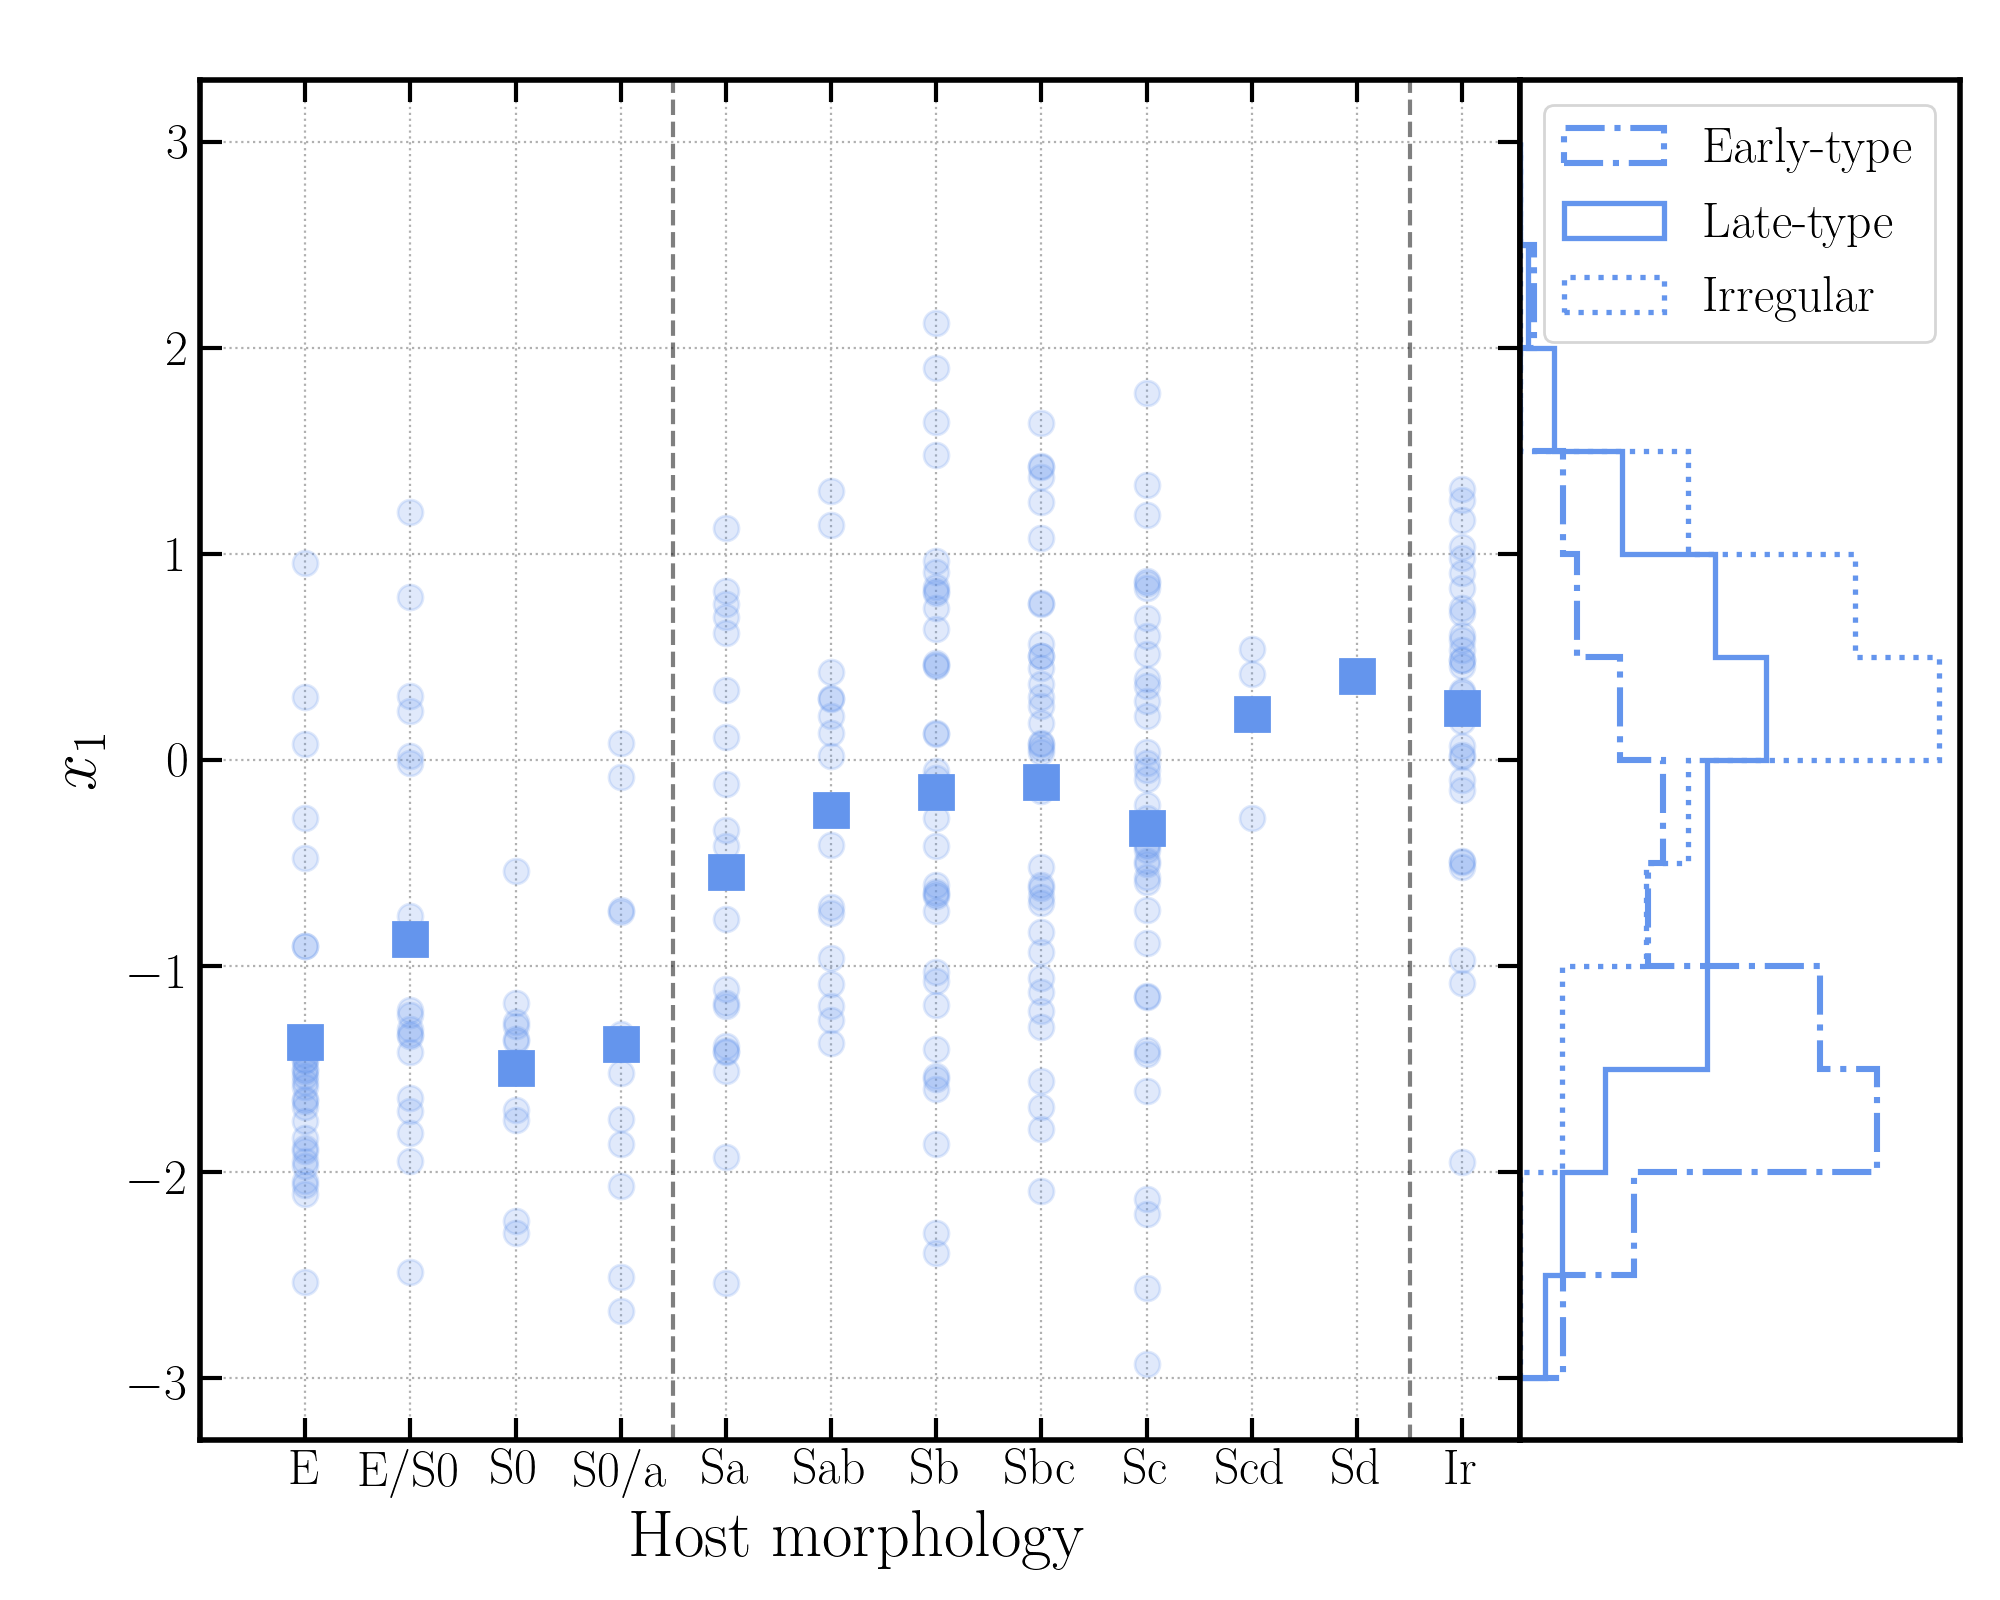

-0.23010593267973847


In [12]:
# Figure for stretch 3 groups

fig = plt.figure(figsize=(10,8))
plt.subplots_adjust(left=.1, bottom=.1, right=.98, top=0.95, wspace=0)
rc('legend', fontsize=18)
rcParams['font.size'] = 18.

rc('axes', linewidth=2)
rc('xtick.major', size=8, width=1.5)
rc('ytick.major', size=8, width=1.5)
rcParams["legend.loc"] = 'upper right'


bins_x1 = [-3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]

ET = SNdata[(SNdata['total_type'] == 'Early-type') | (SNdata['total_type'] == 'Pa') | (SNdata['total_type'] == 'E') | (SNdata['total_type'] == 'E/S0') | (SNdata['total_type'] == 'S0') | (SNdata['total_type'] == 'S0/a')]
LT = SNdata[(SNdata['total_type'] == 'Sa') | (SNdata['total_type'] == 'Sab') | (SNdata['total_type'] == 'Sb') | (SNdata['total_type'] == 'Sbc') | (SNdata['total_type'] == 'Sc') | (SNdata['total_type'] == 'Scd') | (SNdata['total_type'] == 'Sd') | (SNdata['total_type'] == 'Sb/Sbc/Sc')]
IR = SNdata[(SNdata['total_type'] == 'Ir') | (SNdata['total_type'] == 'Scd/Ir')]


# large subplot
plt.subplot2grid((2,4), (0,0), colspan=3,  rowspan=2)
types = ['E','E/S0','S0','S0/a','Sa','Sab','Sb','Sbc','Sc','Scd','Sd','Ir']
types_num = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
for i,j in zip(types, types_num): 
    var = SNdata[SNdata['total_type'].isin([i])]['x1']
    l = np.zeros((len(var),), dtype=int) + j
    plt.plot(l,var, color='cornflowerblue', zorder=3, linestyle='None', marker='o', markersize=9, alpha=0.2) 
    plt.plot(j, var.mean(), color='cornflowerblue', zorder=15, linestyle='None', marker='s', markersize=12, alpha=1)
plt.axvline(x=4.5, color='black', ls='--', alpha=0.5)
plt.axvline(x=11.5, color='black', ls='--', alpha=0.5)


plt.xticks(np.arange(13), ('','E','E/S0','S0','S0/a','Sa','Sab','Sb','Sbc','Sc','Scd','Sd','Ir'))
plt.xlabel('Host morphology', fontsize=24)
plt.ylabel('$x_1$', fontsize=24)
plt.ylim(-3.3, 3.3)
plt.grid(ls=":")

# small subplot
plt.subplot2grid((2,4), (0,3),  rowspan=2)
plt.hist(ET['x1'], bins=bins_x1, histtype='step', orientation='horizontal', edgecolor='cornflowerblue',  facecolor="None", ls='-.', density=True, linewidth=2.2, label='Early-type')
plt.hist(LT['x1'], bins=bins_x1, histtype='step', orientation='horizontal', edgecolor='cornflowerblue',  facecolor="None", ls='-', density=True, linewidth=1.9, label='Late-type')
plt.hist(IR['x1'], bins=bins_x1, histtype='step', orientation='horizontal', edgecolor='cornflowerblue',  facecolor="None", ls=':', density=True, linewidth=1.9, label='Irregular')
plt.ylim(-3.3, 3.3)

plt.xticks([])
plt.yticks([])
plt.legend()

print(np.mean(LT['x1']))
# plt.savefig('../plots/hist_stretch3gr.pdf')

<IPython.core.display.Javascript object>


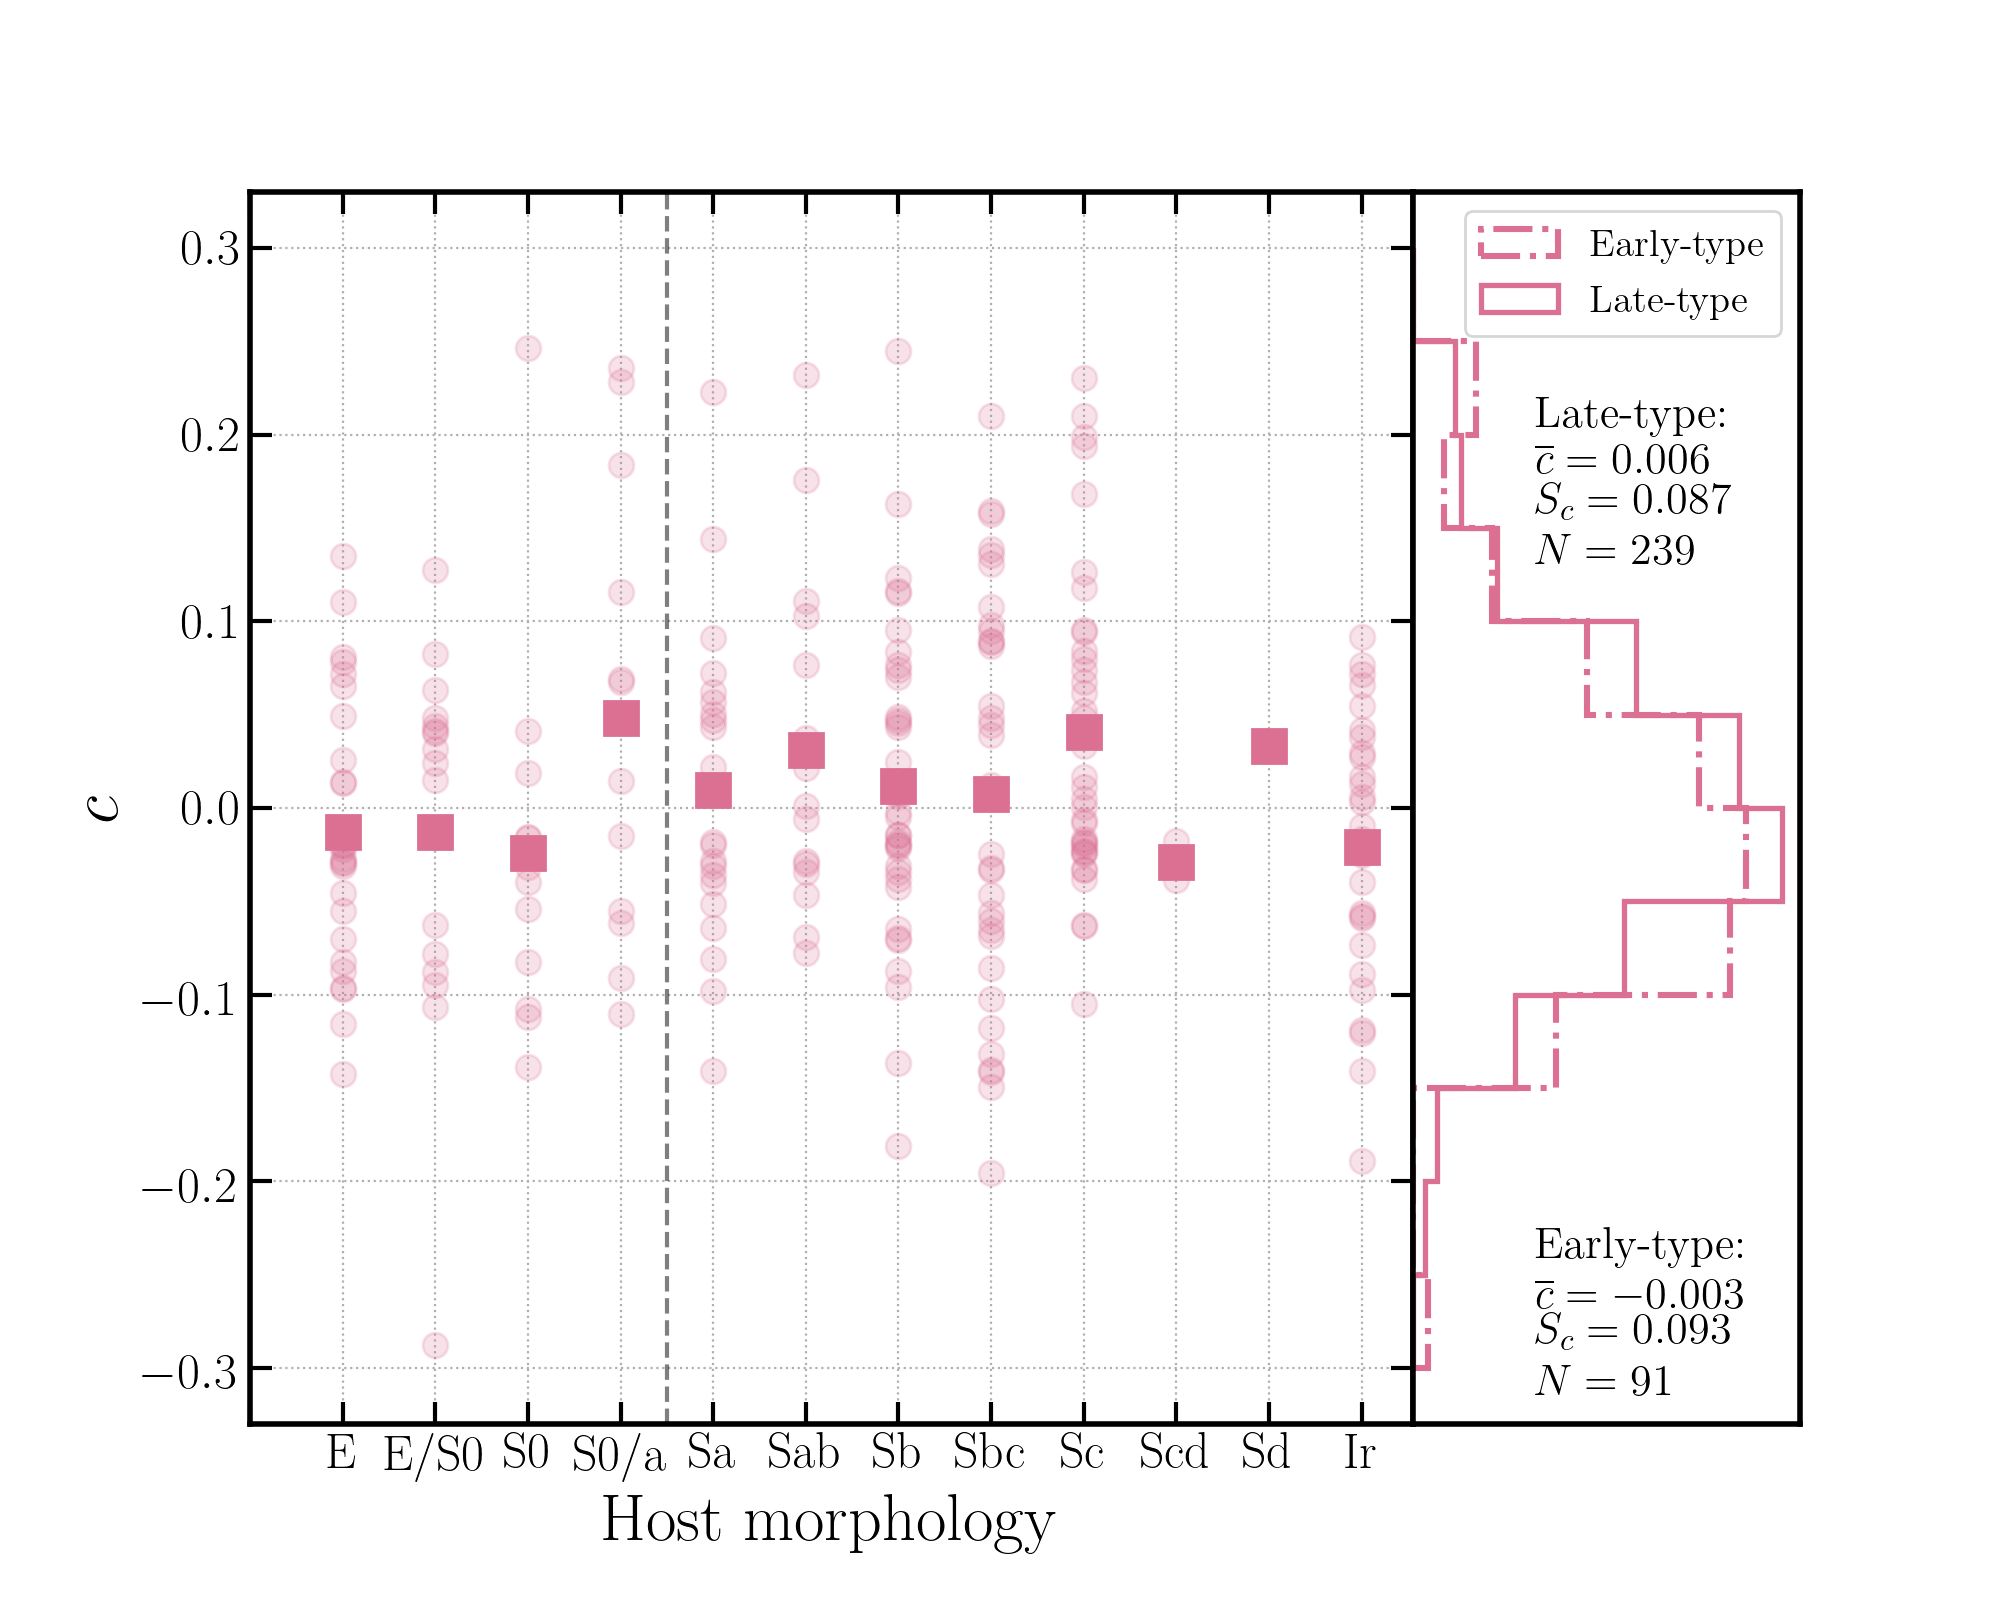

In [18]:
# Figure for color 2 groups

fig = plt.figure(figsize=(10,8))
plt.subplots_adjust(wspace=0)
rc('legend', fontsize=14)
rcParams['font.size'] = 18.

rc('axes', linewidth=2)
rc('xtick.major', size=8, width=1.5)
rc('ytick.major', size=8, width=1.5)


bins_c = [-0.3, -0.25, -0.2, -0.15, -0.1, -0.05, 0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]

ET = SNdata[(SNdata['total_type'] == 'Early-type') | (SNdata['total_type'] == 'Pa') | (SNdata['total_type'] == 'E') | (SNdata['total_type'] == 'E/S0') | (SNdata['total_type'] == 'S0') | (SNdata['total_type'] == 'S0/a')]
LT = SNdata[(SNdata['total_type'] == 'Sa') | (SNdata['total_type'] == 'Sab') | (SNdata['total_type'] == 'Sb') | (SNdata['total_type'] == 'Sbc') | (SNdata['total_type'] == 'Sc') | (SNdata['total_type'] == 'Scd') | (SNdata['total_type'] == 'Sd') | (SNdata['total_type'] == 'Ir') | (SNdata['total_type'] == 'SF') | (SNdata['total_type'] == 'Late-type') | (SNdata['total_type'] == 'Sb/Sbc/Sc') | (SNdata['total_type'] == 'Scd/Ir')]


# large subplot
plt.subplot2grid((2,4), (0,0), colspan=3,  rowspan=2)
types = ['E','E/S0','S0','S0/a','Sa','Sab','Sb','Sbc','Sc','Scd','Sd','Ir']
types_num = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
for i,j in zip(types, types_num): 
    var = SNdata[SNdata['total_type'].isin([i])]['c']
    l = np.zeros((len(var),), dtype=int) + j
    plt.plot(l,var, color='palevioletred', zorder=3, linestyle='None', marker='o', markersize=9, alpha=0.2) 
    plt.plot(j, var.mean(), color='palevioletred', zorder=15, linestyle='None', marker='s', markersize=12, alpha=1)
plt.axvline(x=4.5, color='black', ls='--', alpha=0.5)

plt.xticks(np.arange(13), ('','E','E/S0','S0','S0/a','Sa','Sab','Sb','Sbc','Sc','Scd','Sd','Ir'))
plt.xlabel('Host morphology', fontsize=24)
plt.ylabel('$c$', fontsize=24)
plt.ylim(-0.33, 0.33)
plt.grid(ls=":")


# small subplot
plt.subplot2grid((2,4), (0,3),  rowspan=2)
plt.hist(ET['c'], bins=bins_c, histtype='step', orientation='horizontal', edgecolor='palevioletred',  facecolor="None", ls='-.', density=True, linewidth=2.2, label='Early-type')
plt.hist(LT['c'], bins=bins_c, histtype='step', orientation='horizontal', edgecolor='palevioletred',  facecolor="None", ls='-', density=True, linewidth=1.9, label='Late-type')
plt.ylim(-0.33, 0.33)
plt.text(1.7,-0.315,'Early-type:\n $\overline{c}=%1.3f$ \n $S_c=%1.3f$ \n $N=%i$' % (np.mean(ET['c']), np.std(ET['c'], ddof=1), len(ET)),
         bbox=dict(boxstyle="square",
                   ec='None',
                   fc='None',
                   linestyle='-.',
                   ),
         fontsize=16
        )
plt.text(1.7,0.13,'Late-type:\n $\overline{c}=%1.3f$ \n $S_c=%1.3f$ \n $N=%i$' % (np.mean(LT['c']), np.std(LT['c'], ddof=1), len(LT)),
         bbox=dict(boxstyle="square",
                   ec='None',
                   fc='None',
                   linestyle='-',
                   lw=1.3,
                   ),
         fontsize=16
        )
plt.xticks([])
plt.yticks([])
plt.legend()

# plt.savefig('../plots/hist_color.pdf')

<IPython.core.display.Javascript object>


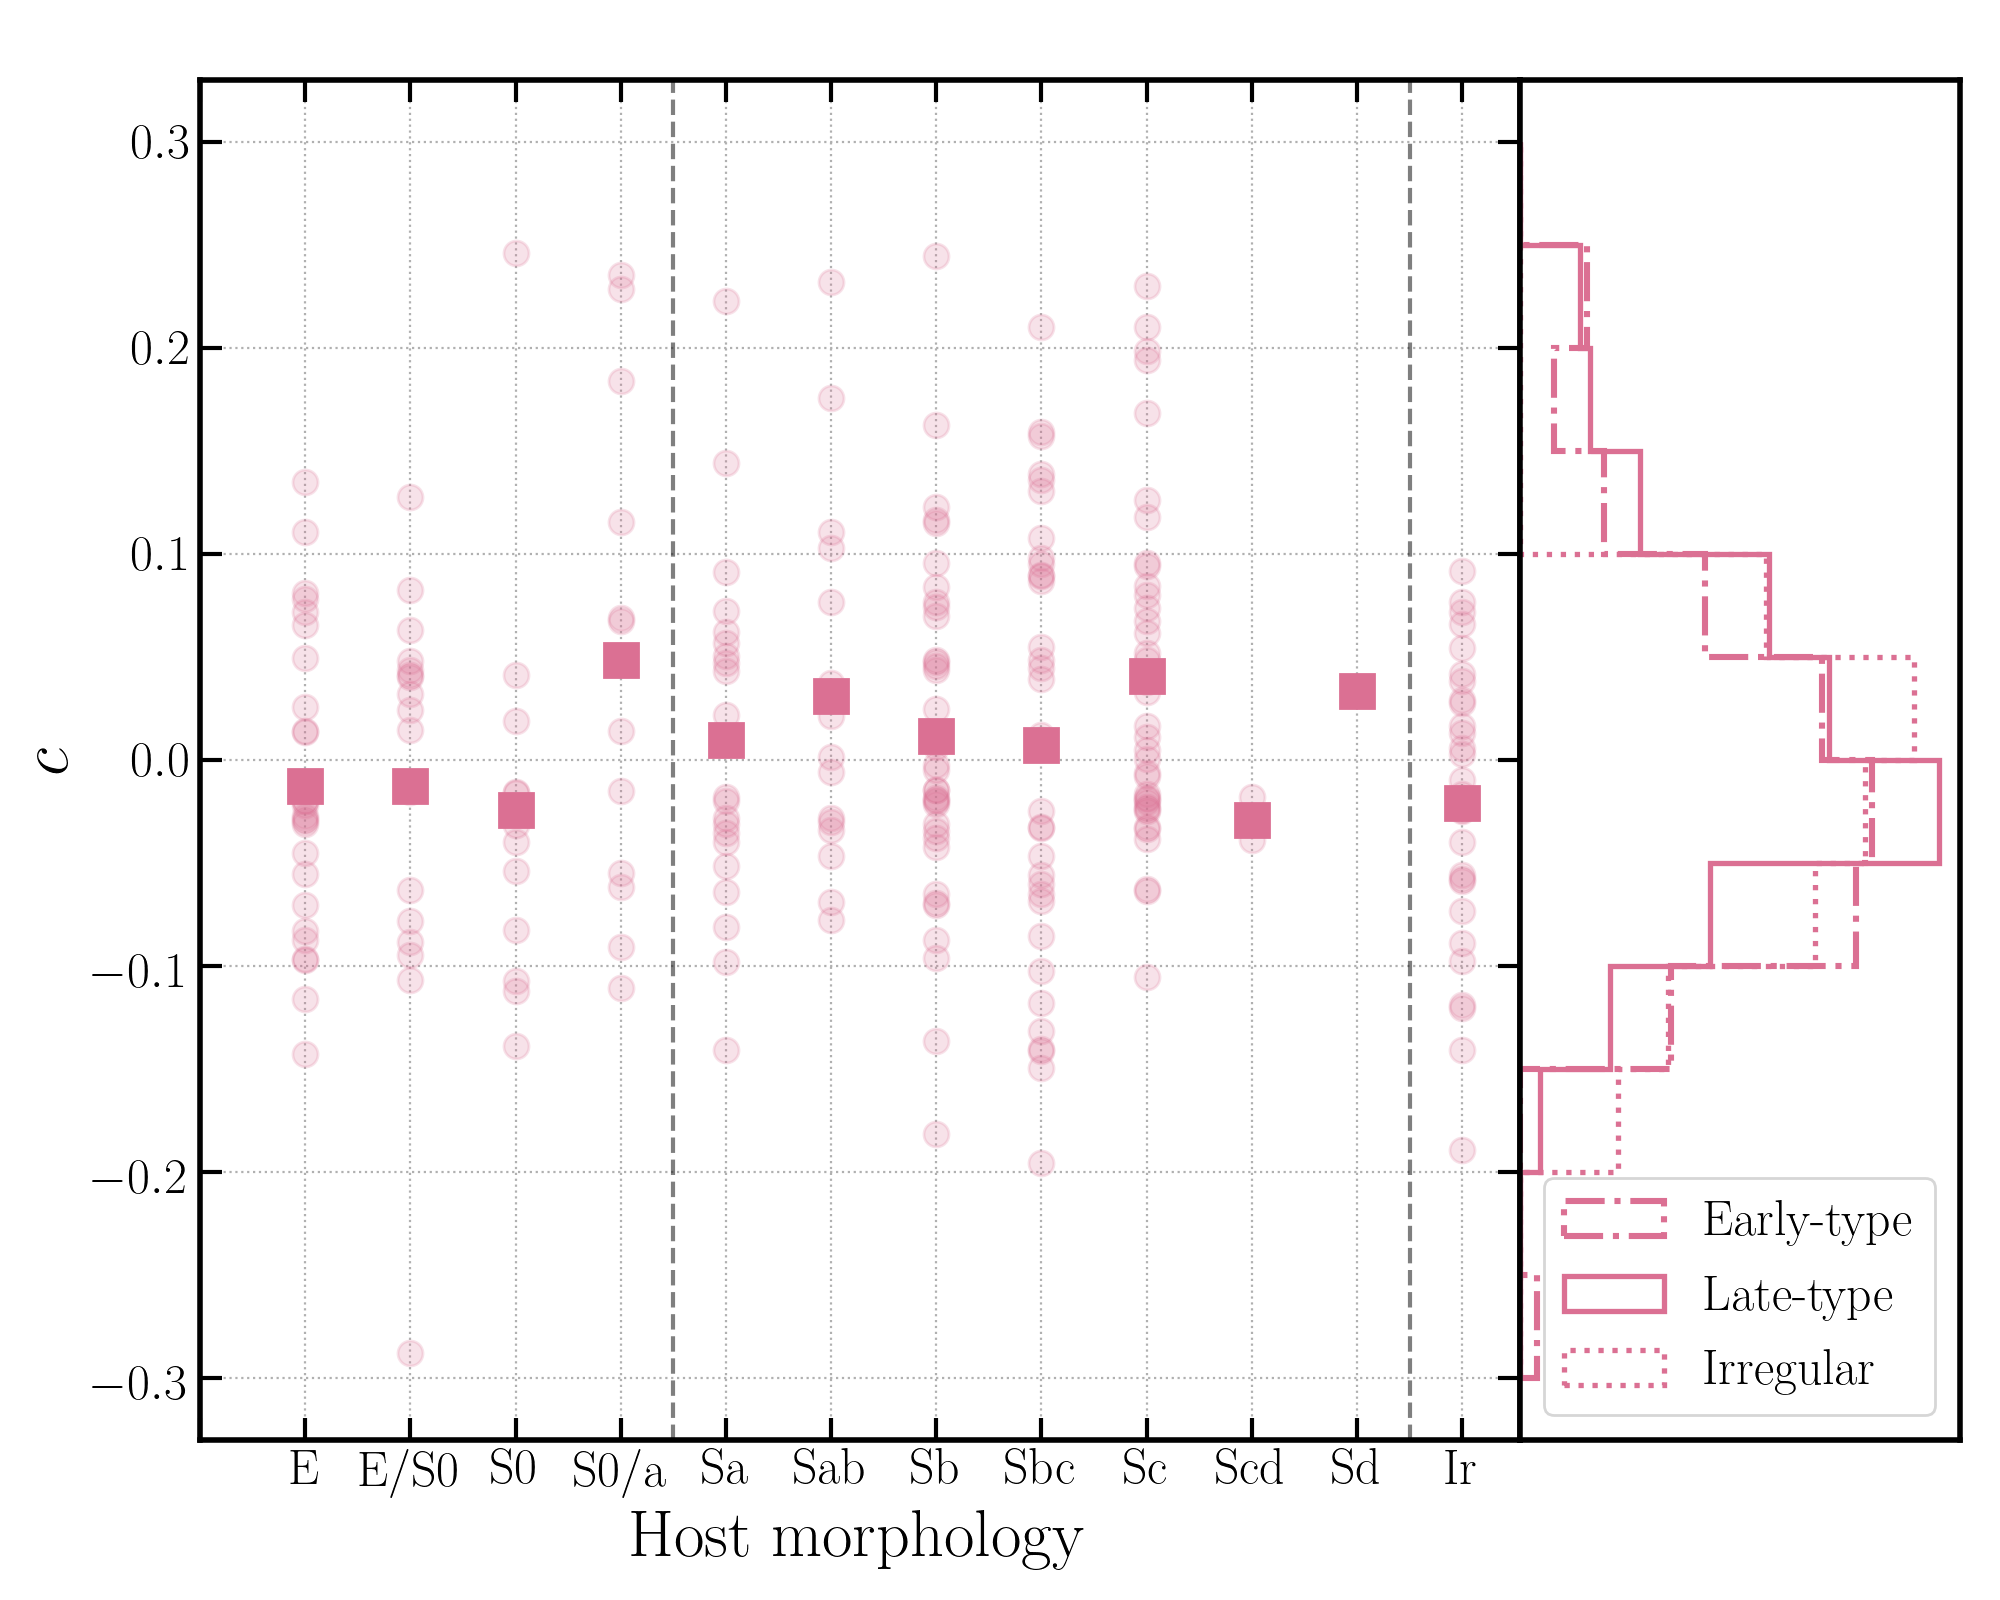

In [21]:
# Figure for color 3 groups

fig = plt.figure(figsize=(10,8))
plt.subplots_adjust(left=.1, bottom=.1, right=.98, top=0.95, wspace=0)
rc('legend', fontsize=18)
rcParams['font.size'] = 18.

rc('axes', linewidth=2)
rc('xtick.major', size=8, width=1.5)
rc('ytick.major', size=8, width=1.5)


bins_c = [-0.3, -0.25, -0.2, -0.15, -0.1, -0.05, 0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]

ET = SNdata[(SNdata['total_type'] == 'Early-type') | (SNdata['total_type'] == 'Pa') | (SNdata['total_type'] == 'E') | (SNdata['total_type'] == 'E/S0') | (SNdata['total_type'] == 'S0') | (SNdata['total_type'] == 'S0/a')]
LT = SNdata[(SNdata['total_type'] == 'Sa') | (SNdata['total_type'] == 'Sab') | (SNdata['total_type'] == 'Sb') | (SNdata['total_type'] == 'Sbc') | (SNdata['total_type'] == 'Sc') | (SNdata['total_type'] == 'Scd') | (SNdata['total_type'] == 'Sd') | (SNdata['total_type'] == 'Sb/Sbc/Sc')]
IR = SNdata[(SNdata['total_type'] == 'Ir') | (SNdata['total_type'] == 'Scd/Ir')]

# large subplot
plt.subplot2grid((2,4), (0,0), colspan=3,  rowspan=2)
types = ['E','E/S0','S0','S0/a','Sa','Sab','Sb','Sbc','Sc','Scd','Sd','Ir']
types_num = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
for i,j in zip(types, types_num): 
    var = SNdata[SNdata['total_type'].isin([i])]['c']
    l = np.zeros((len(var),), dtype=int) + j
    plt.plot(l,var, color='palevioletred', zorder=3, linestyle='None', marker='o', markersize=9, alpha=0.2) 
    plt.plot(j, var.mean(), color='palevioletred', zorder=15, linestyle='None', marker='s', markersize=12, alpha=1)
plt.axvline(x=4.5, color='black', ls='--', alpha=0.5)
plt.axvline(x=11.5, color='black', ls='--', alpha=0.5)

plt.xticks(np.arange(13), ('','E','E/S0','S0','S0/a','Sa','Sab','Sb','Sbc','Sc','Scd','Sd','Ir'))
plt.xlabel('Host morphology', fontsize=24)
plt.ylabel('$c$', fontsize=24)
plt.ylim(-0.33, 0.33)
plt.grid(ls=":")


# small subplot
plt.subplot2grid((2,4), (0,3),  rowspan=2)
plt.hist(ET['c'], bins=bins_c, histtype='step', orientation='horizontal', edgecolor='palevioletred',  facecolor="None", ls='-.', density=True, linewidth=2.2, label='Early-type')
plt.hist(LT['c'], bins=bins_c, histtype='step', orientation='horizontal', edgecolor='palevioletred',  facecolor="None", ls='-', density=True, linewidth=1.9, label='Late-type')
plt.hist(IR['c'], bins=bins_c, histtype='step', orientation='horizontal', edgecolor='palevioletred',  facecolor="None", ls=':', density=True, linewidth=1.9, label='Irregular')

plt.ylim(-0.33, 0.33)

plt.xticks([])
plt.yticks([])
plt.legend(loc=4)

# plt.savefig('../plots/hist_color3gr.pdf')

<IPython.core.display.Javascript object>


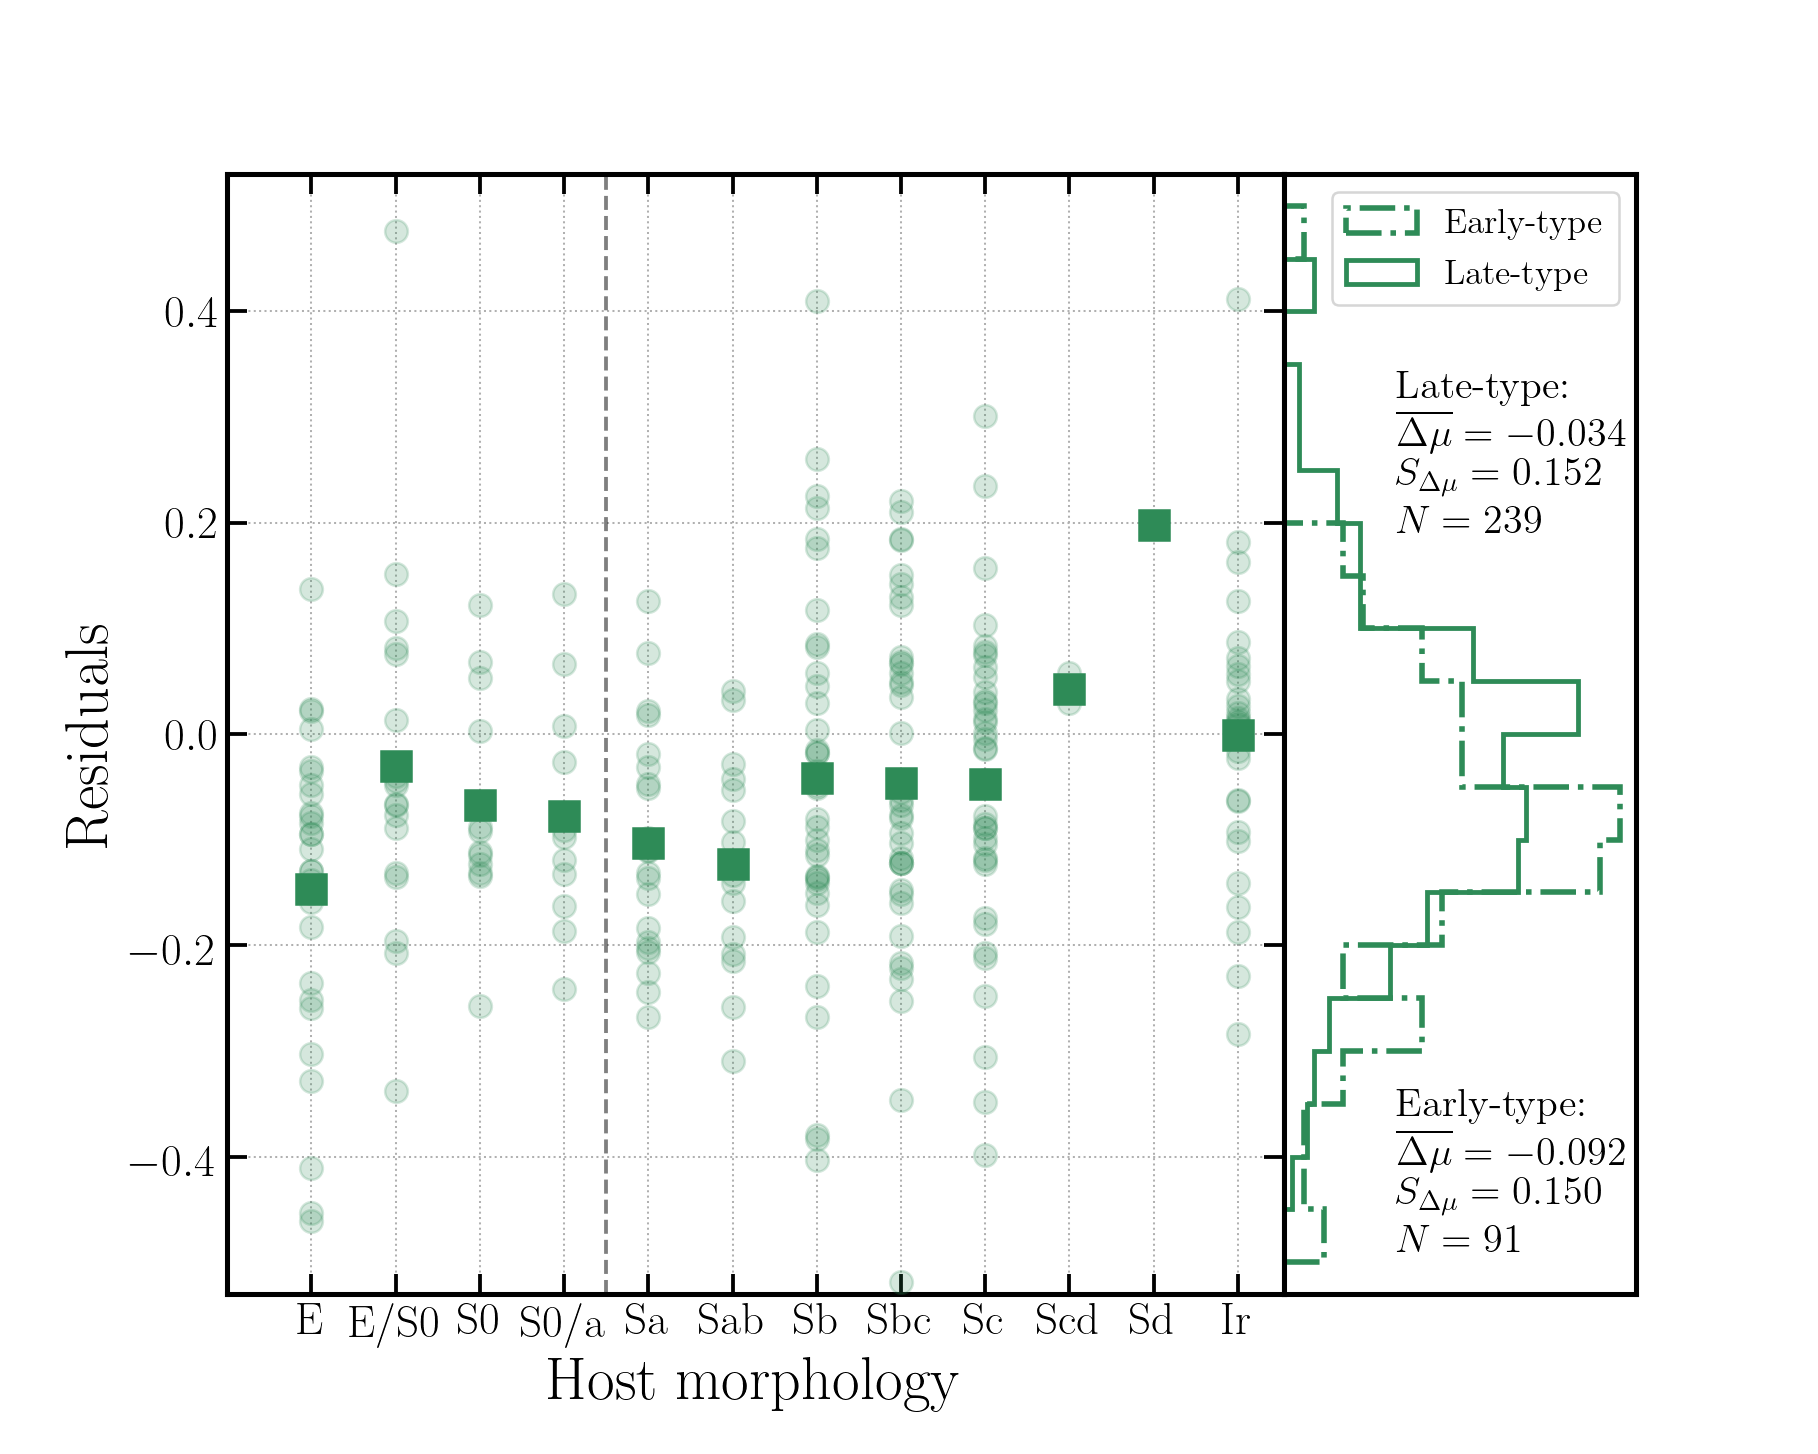

/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [11]:
# Figure for mu residuals 2 groups

fig = plt.figure(figsize=(10,8))
plt.subplots_adjust(wspace=0)
rc('legend', fontsize=14)
rcParams['font.size'] = 18.

rc('axes', linewidth=2)
rc('xtick.major', size=8, width=1.5)
rc('ytick.major', size=8, width=1.5)

gamma0 = 0.053 # 0.054 for C11
m_step = 10.13
tau = 0.001

SNdata['Delta_m'] = gamma0 / (1 + np.exp(-(SNdata['HOST_LOGMASS']-m_step)/tau))

bins_c = [-0.5, -0.45, -0.4, -0.35, -0.3, -0.25, -0.2, -0.15, -0.1, -0.05, 0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
# bins_c = [-0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5]

ET = SNdata[(SNdata['total_type'] == 'Early-type') | (SNdata['total_type'] == 'Pa') | (SNdata['total_type'] == 'E') | (SNdata['total_type'] == 'E/S0') | (SNdata['total_type'] == 'S0') | (SNdata['total_type'] == 'S0/a')]
LT = SNdata[(SNdata['total_type'] == 'Sa') | (SNdata['total_type'] == 'Sab') | (SNdata['total_type'] == 'Sb') | (SNdata['total_type'] == 'Sbc') | (SNdata['total_type'] == 'Sc') | (SNdata['total_type'] == 'Scd') | (SNdata['total_type'] == 'Sd') | (SNdata['total_type'] == 'Ir') | (SNdata['total_type'] == 'SF') | (SNdata['total_type'] == 'Late-type') | (SNdata['total_type'] == 'Sb/Sbc/Sc') | (SNdata['total_type'] == 'Scd/Ir')]


# large subplot
plt.subplot2grid((2,4), (0,0), colspan=3,  rowspan=2)
types = ['E','E/S0','S0','S0/a','Sa','Sab','Sb','Sbc','Sc','Scd','Sd','Ir']
types_num = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
for i,j in zip(types, types_num): 
    var = SNdata[SNdata['total_type'].isin([i])]['MU'] - SNdata[SNdata['total_type'].isin([i])]['MUMODEL'] - SNdata[SNdata['total_type'].isin([i])]['Delta_m']
    l = np.zeros((len(var),), dtype=int) + j
    plt.plot(l,var, color='seagreen', zorder=3, linestyle='None', marker='o', markersize=9, alpha=0.2) 
    plt.plot(j, var.mean(), color='seagreen', zorder=15, linestyle='None', marker='s', markersize=12, alpha=1)
plt.axvline(x=4.5, color='black', ls='--', alpha=0.5)

plt.xticks(np.arange(13), ('','E','E/S0','S0','S0/a','Sa','Sab','Sb','Sbc','Sc','Scd','Sd','Ir'))
plt.xlabel('Host morphology', fontsize=24)
plt.ylabel('Residuals', fontsize=24)
plt.ylim(-0.53, 0.53)
plt.grid(ls=":")


# small subplot
plt.subplot2grid((2,4), (0,3),  rowspan=2)


ET_res = ET['MU']-ET['MUMODEL']-ET['Delta_m']
LT_res = LT['MU']-LT['MUMODEL']-LT['Delta_m']


plt.hist(ET_res, bins=bins_c, histtype='step', orientation='horizontal', edgecolor='seagreen',  facecolor="None", ls='-.', density=True, linewidth=2.2, label='Early-type')
plt.hist(LT_res, bins=bins_c, histtype='step', orientation='horizontal', edgecolor='seagreen',  facecolor="None", ls='-', density=True, linewidth=1.9, label='Late-type')
plt.ylim(-0.53, 0.53)
plt.text(1.25,-0.49,'Early-type:\n $\overline{\Delta\mu}=%1.3f$ \n $S_{\Delta\mu}=%1.3f$ \n $N=%i$' % (np.mean(ET_res), np.std(ET_res, ddof=1), len(ET)),
         bbox=dict(boxstyle="square",
                   ec='None',
                   fc='None',
                   linestyle='-.',
                   ),
         fontsize=16
        )
plt.text(1.25,0.19,'Late-type:\n $\overline{\Delta\mu}=%1.3f$ \n $S_{\Delta\mu}=%1.3f$ \n $N=%i$' % (np.mean(LT_res), np.std(LT_res, ddof=1), len(LT)),
         bbox=dict(boxstyle="square",
                   ec='None',
                   fc='None',
                   linestyle='-',
                   lw=1.3,
                   ),
         fontsize=16
        )
plt.xticks([])
plt.yticks([])
plt.legend()

# plt.savefig('../plots/hist_res.pdf')

<IPython.core.display.Javascript object>


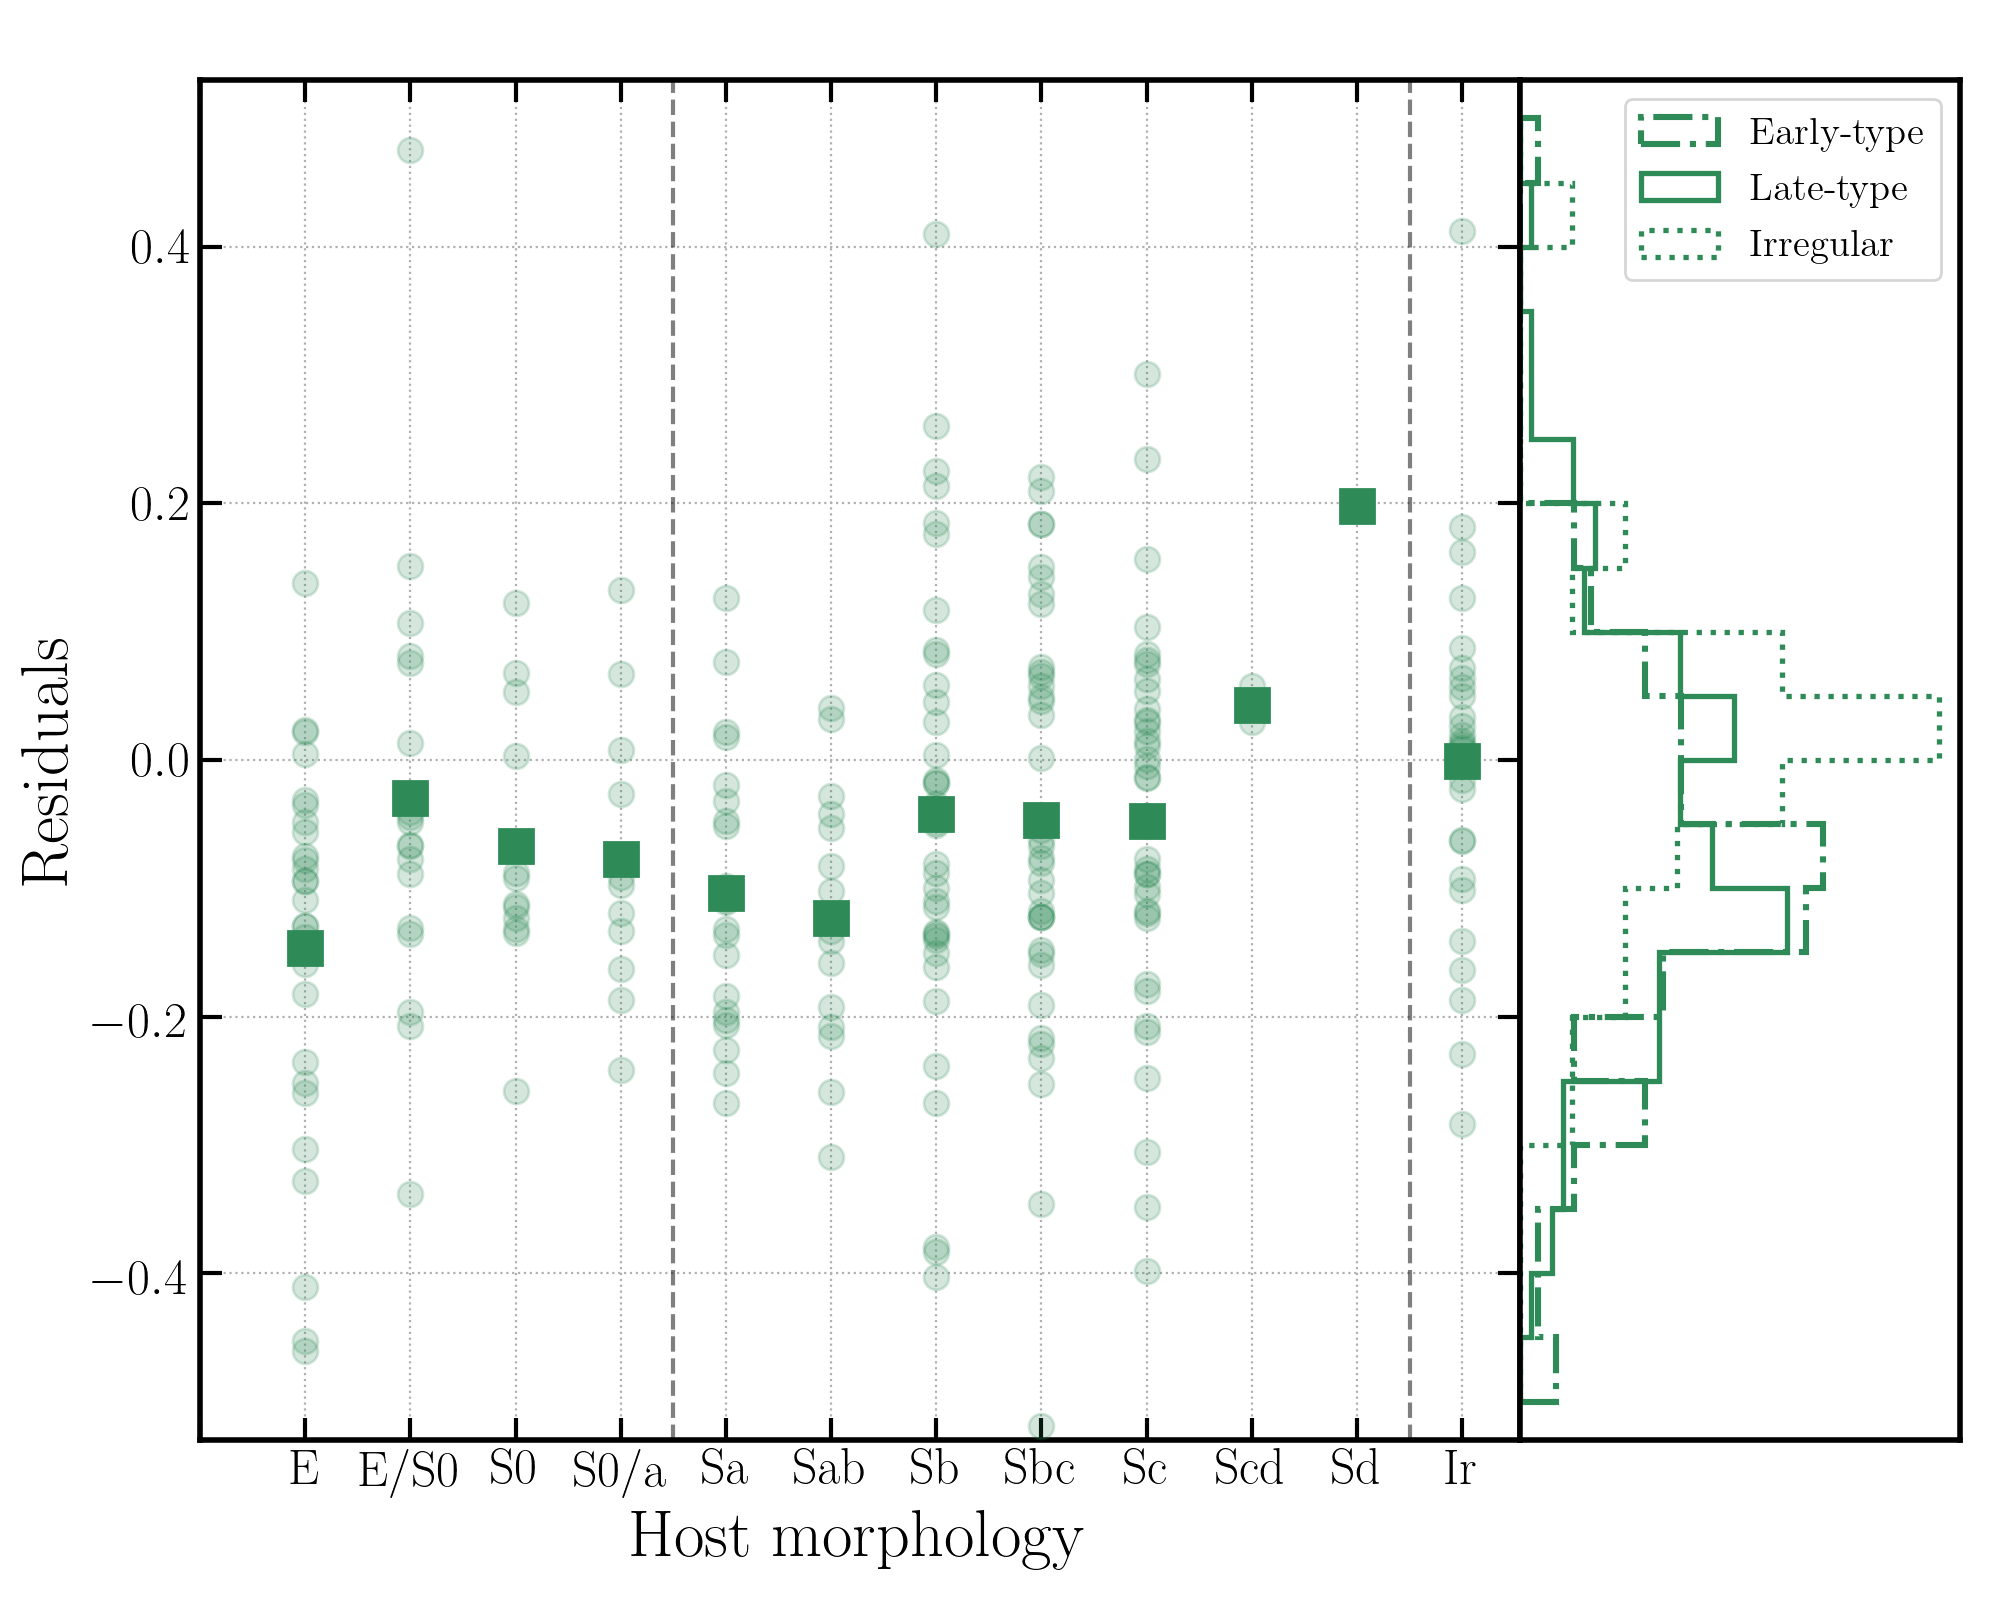

-0.0916923076923073 -0.057345751649042126 0.0007870967741933918
0.14868693508880712 0.1532291363492444 0.12896943559377755
91


/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [10]:
# Figure for mu residuals 3 groups

fig = plt.figure(figsize=(10,8))
plt.subplots_adjust(left=.1, bottom=.1, right=.98, top=0.95, wspace=0)
rc('legend', fontsize=14)
rcParams['font.size'] = 18.

rc('axes', linewidth=2)
rc('xtick.major', size=8, width=1.5)
rc('ytick.major', size=8, width=1.5)

gamma0 = 0.053 # 0.054 for C11
m_step = 10.13
tau = 0.001

SNdata['Delta_m'] = gamma0 / (1 + np.exp(-(SNdata['HOST_LOGMASS']-m_step)/tau))

bins_re = [-0.5, -0.45, -0.4, -0.35, -0.3, -0.25, -0.2, -0.15, -0.1, -0.05, 0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]

ET = SNdata[(SNdata['total_type'] == 'Early-type') | (SNdata['total_type'] == 'Pa') | (SNdata['total_type'] == 'E') | (SNdata['total_type'] == 'E/S0') | (SNdata['total_type'] == 'S0') | (SNdata['total_type'] == 'S0/a')]
LT = SNdata[(SNdata['total_type'] == 'Sa') | (SNdata['total_type'] == 'Sab') | (SNdata['total_type'] == 'Sb') | (SNdata['total_type'] == 'Sbc') | (SNdata['total_type'] == 'Sc') | (SNdata['total_type'] == 'Scd') | (SNdata['total_type'] == 'Sd') | (SNdata['total_type'] == 'Sb/Sbc/Sc')]
IR = SNdata[(SNdata['total_type'] == 'Ir') | (SNdata['total_type'] == 'Scd/Ir')]

# large subplot
plt.subplot2grid((2,4), (0,0), colspan=3,  rowspan=2)
types = ['E','E/S0','S0','S0/a','Sa','Sab','Sb','Sbc','Sc','Scd','Sd','Ir']
types_num = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
for i,j in zip(types, types_num): 
    var = SNdata[SNdata['total_type'].isin([i])]['MU'] - SNdata[SNdata['total_type'].isin([i])]['MUMODEL'] - SNdata[SNdata['total_type'].isin([i])]['Delta_m']
    l = np.zeros((len(var),), dtype=int) + j
    plt.plot(l,var, color='seagreen', zorder=3, linestyle='None', marker='o', markersize=9, alpha=0.2) 
    plt.plot(j, var.mean(), color='seagreen', zorder=15, linestyle='None', marker='s', markersize=12, alpha=1)
plt.axvline(x=4.5, color='black', ls='--', alpha=0.5)
plt.axvline(x=11.5, color='black', ls='--', alpha=0.5)

plt.xticks(np.arange(13), ('','E','E/S0','S0','S0/a','Sa','Sab','Sb','Sbc','Sc','Scd','Sd','Ir'))
plt.xlabel('Host morphology', fontsize=24)
plt.ylabel('Residuals', fontsize=24)
plt.ylim(-0.53, 0.53)
plt.grid(ls=":")


# small subplot
plt.subplot2grid((2,4), (0,3),  rowspan=2)


ET_res = ET['MU']-ET['MUMODEL']-ET['Delta_m']
LT_res = LT['MU']-LT['MUMODEL']-LT['Delta_m']
IR_res = IR['MU']-IR['MUMODEL']-IR['Delta_m']


plt.hist(ET_res, bins=bins_re, histtype='step', orientation='horizontal', edgecolor='seagreen',  facecolor="None", ls='-.', density=True, linewidth=2.2, label='Early-type')
plt.hist(LT_res, bins=bins_re, histtype='step', orientation='horizontal', edgecolor='seagreen',  facecolor="None", ls='-', density=True, linewidth=1.9, label='Late-type')
plt.hist(IR_res, bins=bins_re, histtype='step', orientation='horizontal', edgecolor='seagreen',  facecolor="None", ls=':', density=True, linewidth=1.9, label='Irregular')
plt.ylim(-0.53, 0.53)

plt.xticks([])
plt.yticks([])
plt.legend()


# plt.savefig('../plots/hist_res3gr.pdf')

<IPython.core.display.Javascript object>


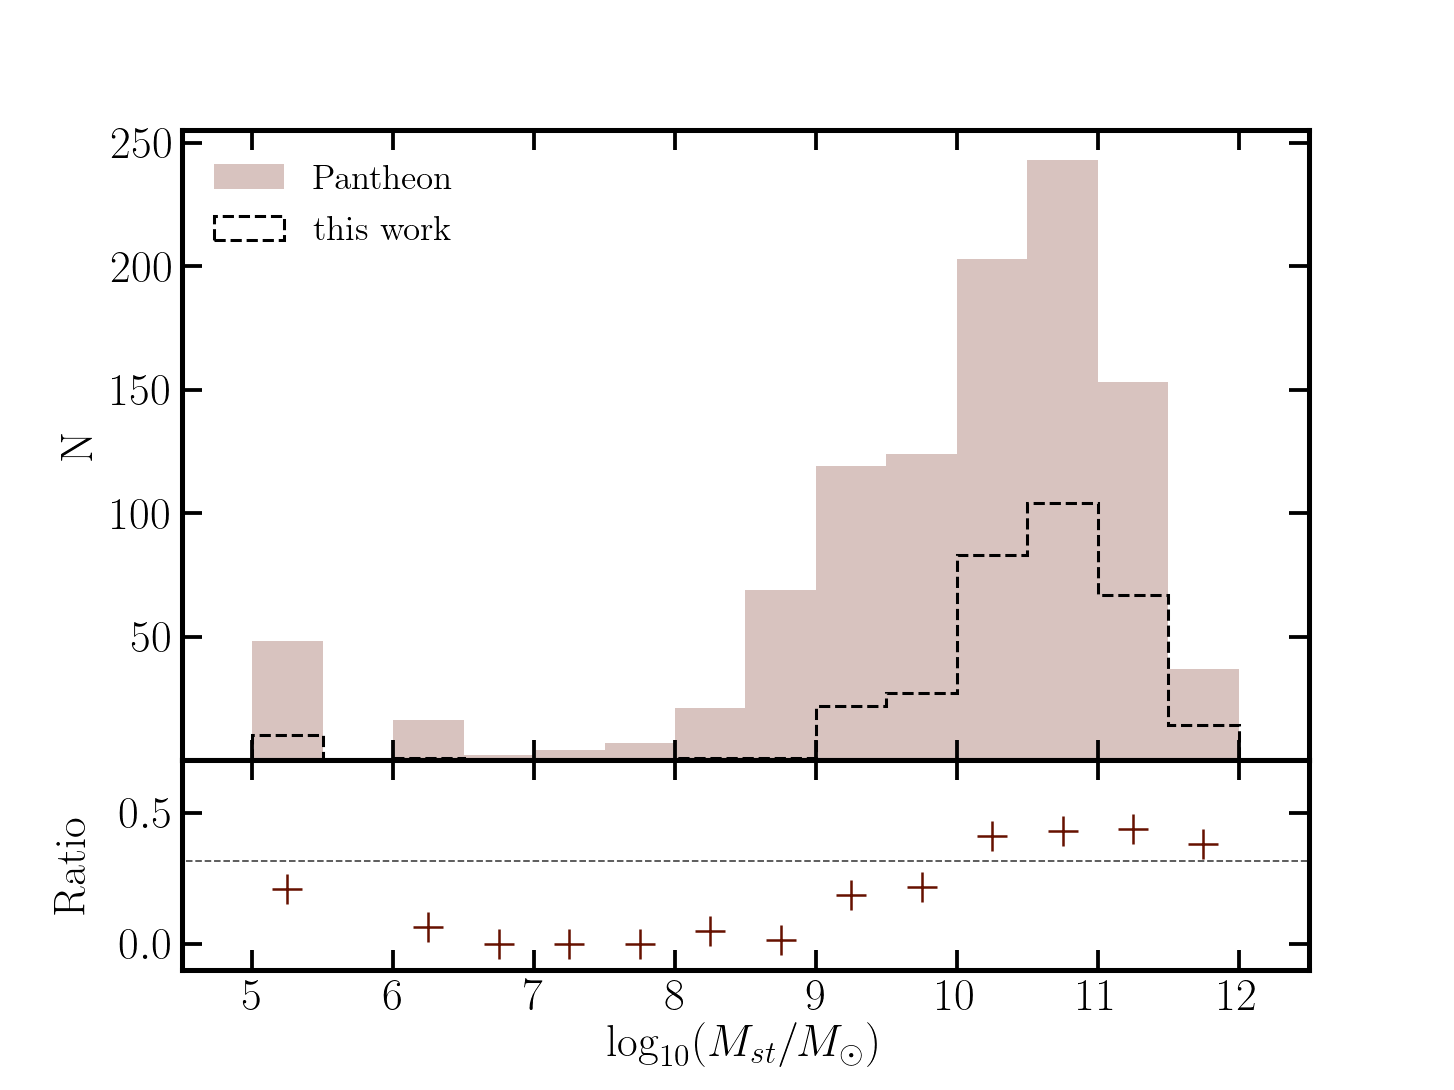

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in true_divide


In [15]:
# Figure M_st distribution
fig = plt.figure(figsize=(8,6))
# fig.subplots_adjust(left=.05, bottom=.15, right=.85, top=.95)

fig.subplots_adjust(hspace=0)

gs = GridSpec(2, 1, height_ratios=[3, 1])
ax0 = fig.add_subplot(gs[0])
ax1 = fig.add_subplot(gs[1])


rc('legend', fontsize=14)
rcParams['font.size'] = 18.

rc('axes', linewidth=2)
rc('xtick.major', size=8, width=1.5)
rc('ytick.major', size=8, width=1.5)

bins_mst = [5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10, 10.5, 11, 11.5, 12]
bins_mst_bottom = [5.25, 5.75, 6.25, 6.75, 7.25, 7.75, 8.25, 8.75, 9.25, 9.75, 10.25, 10.75, 11.25, 11.75]

mp1, mp2, mp3 = ax0.hist(SNdata['HOST_LOGMASS'], bins=bins_mst, edgecolor='None',  facecolor="#661100", alpha=0.25, ls='None', linewidth=1.2, label='Pantheon', zorder=0)
mw1, mw2, mw3 = ax0.hist(SNdata[SNdata['total_type'].notna()]['HOST_LOGMASS'], bins=bins_mst, histtype='step', edgecolor='black',  facecolor="None", ls='dashed', linewidth=1.2, label='this work')
ax0.set_xlabel('$\log_{10} (M_{st}/M_\odot)$')
ax0.set_ylabel('N')
ax0.set_xlim(4.5,12.5)
ax0.legend(frameon=False, loc='best')
yticks = ax0.yaxis.get_major_ticks() 
yticks[0].label1.set_visible(False)

ax1.plot(bins_mst_bottom, mw1/mp1, marker='+', ms=12, ls = '', color="#661100", alpha=1)
ax1.set_xlabel('$\log_{10} (M_{st}/M_\odot)$')
ax1.set_ylabel('Ratio', labelpad=10)
ax1.hlines(len(SNdata[SNdata['total_type'].notna()]['HOST_LOGMASS'])/len(SNdata['HOST_LOGMASS']), 4, 13, ls='dashed', alpha=0.7, lw=0.7)
ax1.set_xlim(4.5,12.5)
ax1.set_ylim(-0.1,0.7)


# plt.savefig('../plots/hist_mst.pdf')

In [13]:
stats.ttest_ind(ET['x1'], LT['x1'], equal_var=False)

Ttest_indResult(statistic=-8.548955867457032, pvalue=8.753956619777352e-15)

In [8]:
stats.ttest_ind(ET['c'], LT['c'], equal_var=False)

Ttest_indResult(statistic=-0.7632381416021183, pvalue=0.44648855864631276)

In [12]:
gamma0 = 0.053 # 0.054 for C11
m_step = 10.13
tau = 0.001

SNdata['Delta_m'] = gamma0 / (1 + np.exp(-(SNdata['HOST_LOGMASS']-m_step)/tau))

ET_res = ET['MU']-ET['MUMODEL']-ET['Delta_m']
LT_res = LT['MU']-LT['MUMODEL']-LT['Delta_m']
stats.ttest_ind(ET_res, LT_res, equal_var=False)

Ttest_indResult(statistic=-3.138492421160086, pvalue=0.002012743642612627)

In [13]:
ET_res = ET['MU']-ET['MUMODEL']
LT_res = LT['MU']-LT['MUMODEL']
stats.ttest_ind(ET_res, LT_res, equal_var=False)

Ttest_indResult(statistic=-2.568467629028793, pvalue=0.0111268652256296)